In [6]:
from pathlib import Path
from rich import print  # pretty printing

In [22]:
import pandas as pd
import re

def read_txt_as_text(data_path):
    with open(data_path, 'r', encoding='utf-8') as f:
        text = f.read()
    return text

file_path = 'extracted_data.txt'  # Replace with your actual PDF file path
current_dir = Path().resolve()
file_path = current_dir.parent / "data" / file_path

    
text = read_txt_as_text(file_path)
text

'Title: None\nDOI: 10.3390/su2113436\nFullTextURL: http://creativecommons.org/licenses/by/3.0/).\n\nFullTextContent:\nSustainability 2010, 2, 3436-3448; doi:10.3390/su2113436 OPEN ACCESS sustainability ISSN 2071-1050 www.mdpi.com/journal/sustainability Review What is Sustainability? Tom Kuhlman 1,* and John Farrington 2 1 Agricultural Economics Research Institute, Wageningen University, P.O. Box 29703, 2502LS The Hague, The Netherlands 2 Institute for Rural Research, Geography and Environment, University of Aberdeen, Elphinstone Road, Aberdeen AB24 3UF, Scotland, UK; E-Mail: j.farrington@abdn.ac.uk * Author to whom correspondence should be addressed; E-Mail: tom.kuhlman@wur.nl; Tel.: +31-70-3358-232; Fax: +31-70-3615-624. Received: 17 September 2010; in revised form: 15 October 2010 / Accepted: 19 October 2010 / Published: 1 November 2010 Abstract: Sustainability as a policy concept has its origin in the Brundtland Report of 1987. That document was concerned with the tension between th

In [16]:
print(text[:1000])  # Print the first 1000 characters of the text

Title: None
DOI: 10.3390/su2113436
FullTextURL: http://creativecommons.org/licenses/by/3.0/).

FullTextContent:
Sustainability 2010, 2, 3436-3448; doi:10.3390/su2113436 OPEN ACCESS sustainability ISSN 2071-1050 
www.mdpi.com/journal/sustainability Review What is Sustainability? Tom Kuhlman 1,* and John Farrington 2 1 
Agricultural Economics Research Institute, Wageningen University, P.O. Box 29703, 2502LS The Hague, The Netherlands
2 Institute for Rural Research, Geography and Environment, University of Aberdeen, Elphinstone Road, Aberdeen AB24 
3UF, Scotland, UK; E-Mail: j.farrington@abdn.ac.uk * Author to whom correspondence should be addressed; E-Mail: 
tom.kuhlman@wur.nl; Tel.: +31-70-3358-232; Fax: +31-70-3615-624. Received: 17 September 2010; in revised form: 15 
October 2010 / Accepted: 19 October 2010 / Published: 1 November 2010 Abstract: Sustainability as a policy concept 
has its origin in the Brundtland Report of 1987. That document was concerned with the tension between the aspi

In [23]:
def clean_text(text):
    patterns = [
        r"(?i)OPEN ACCESS", r"www\.\S+", r"doi:\S+", r"ISSN \d+", r"E[-]?Mail:.*?\n",
        r"Tel\.:.*?\n", r"Fax\.:.*?\n", r"Received:.*?\n", r"Accepted:.*?\n", r"Published:.*?\n",
        r"\bCorrespondence\b.*", r"\* Author.*?\n", r"^\s*\d{1,2}\s*$", r"\n{2,}"
    ]
    for pattern in patterns:
        text = re.sub(pattern, "", text)
    return text.strip()

cleaned_text = clean_text(text)

In [18]:
print(cleaned_text[:1000])  # Print the first 1000 characters of the cleaned text

Title: None
DOI: 10.3390/su2113436
FullTextURL: http://creativecommons.org/licenses/by/3.0/).FullTextContent:
Sustainability 2010, 2, 3436-3448;   sustainability -1050  Review What is Sustainability? Tom Kuhlman 1,* and John 
Farrington 2 1 Agricultural Economics Research Institute, Wageningen University, P.O. Box 29703, 2502LS The Hague, 
The Netherlands 2 Institute for Rural Research, Geography and Environment, University of Aberdeen, Elphinstone 
Road, Aberdeen AB24 3UF, Scotland, UK; 
1. Introduction 
The term sustainability has become popular in policy-oriented research as an expression of what public policies 
ought to achieve. The principal inspiration came from the Brundtland Report of 1987 [1]. Since then the concept has
shifted in meaning. This paper argues that the shift is unfortunate in that it obscures the real contradiction 
which exists between long-term sustainability and short-term welfare. Moreover, the distinction between three  
pillars of sustainability is conceptually

In [26]:
# SECTION_HEADERS = [
#     "abstract", "introduction", "background", "literature review", "related work",
#     "method", "methodology", "approach", "results", "experiments",
#     "discussion", "conclusion", "references", "acknowledgements"
# ]

# def detect_sections(text):
#     pattern = r"\n\s*(?:" + "|".join(SECTION_HEADERS) + r")\s*\n"
#     matches = list(re.finditer(pattern, text, flags=re.IGNORECASE))
#     if not matches:
#         return [("Full Text", text)]
#     sections = []
#     for i in range(len(matches)):
#         start = matches[i].end()
#         end = matches[i + 1].start() if i + 1 < len(matches) else len(text)
#         title = matches[i].group(0).strip()
#         content = text[start:end].strip()
#         sections.append((title, content))
#     return sections

# sections = detect_sections(cleaned_text)

In [3]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("This is a sentence. This is another sentence.")
assert doc.has_annotation("SENT_START")
for sent in doc.sents:
    print(sent.text)


This is a sentence.
This is another sentence.


nce(text_or_texts, str):
--> 751     return next(
    752         self._split(
    753             [text_or_texts],
    754             threshold=threshold,
    755             stride=stride,
    756             block_size=block_size,
    757             batch_size=batch_size,
    758             pad_last_batch=pad_last_batch,
    759             weighting=weighting,
    760             remove_whitespace_before_inference=remove_whitespace_before_inference,
    761             outer_batch_size=outer_batch_size,

In [25]:
import re

words = re.findall(r'\b\w+\b', paragraph.lower())  # lowercase and remove punctuation

# Step 2: Get unique words
unique_words = set(words)

# Step 3: Get the length
print(f"Number of unique words: {len(unique_words)}")

Number of unique words: 130

35

In [5]:
import spacy
from spacy.language import Language

@Language.component("info_component")
def my_component(doc):
    print(f"After tokenization, this doc has {len(doc)} tokens.")
    print("The part-of-speech tags are:", [token.pos_ for token in doc])
    if len(doc) < 10:
        print("This is a pretty short document.")
    return doc

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("info_component", name="print_info", last=True)
print(nlp.pipe_names)  # ['tagger', 'parser', 'ner', 'print_info']
doc = nlp("This is a sentence.")

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'print_info']
After tokenization, this doc has 5 tokens.
The part-of-speech tags are: ['PRON', 'AUX', 'DET', 'NOUN', 'PUNCT']
This is a pretty short document.


In [6]:
import spacy
from spacy.language import Language

@Language.component("custom_sentencizer")
def custom_sentencizer(doc):
    for i, token in enumerate(doc[:-2]):
        # Define sentence start if pipe + titlecase token
        if token.text == "|" and doc[i + 1].is_title:
            doc[i + 1].is_sent_start = True
        else:
            # Explicitly set sentence start to False otherwise, to tell
            # the parser to leave those tokens alone
            doc[i + 1].is_sent_start = False
    return doc

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("custom_sentencizer", before="parser")  # Insert before the parser
doc = nlp("This is. A sentence. | This is. Another sentence.")
for sent in doc.sents:
    print(sent.text)

This is. A sentence. |
This is. Another sentence.


In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [6]:
from pathlib import Path
from rich import print  # pretty printing

In [10]:
from unstructured.partition.pdf import partition_pdf
from langchain_docling import DoclingLoader


In [11]:
file_path = 'What_is_Sustainability-1.pdf'  # Replace with your actual PDF file path
current_dir = Path().resolve()
file_path = current_dir.parent / "data" / file_path


loader = DoclingLoader(file_path=file_path)

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

In [12]:
docs = loader.load()
for d in docs[:3]:
    print(f"- {d.page_content=}")

- d.page_content='Review'

- d.page_content='Tom Kuhlman  1, * and John Farrington 2\n- 1 Agricultural Economics Research Institute, 
Wageningen University, P.O. Box 29703, 2502LS The Hague, The Netherlands\n- 2 Institute for Rural Research, 
Geography and Environment, University of Aberdeen, Elphinstone Road, Aberdeen AB24 3UF, Scotland, UK; E-Mail: 
j.farrington@abdn.ac.uk\n* Author to whom correspondence should be addressed; E-Mail: tom.kuhlman@wur.nl; Tel.: 
+31-70-3358-232; Fax: +31-70-3615-624.\nReceived: 17 September 2010; in revised form: 15 October 2010 / Accepted: 
19 October 2010 /\nPublished: 1 November 2010'

- d.page_content='Tom Kuhlman  1, * and John Farrington 2\nAbstract: Sustainability  as  a  policy  concept  has  
its  origin  in  the  Brundtland  Report of  1987.  That  document  was  concerned  with  the  tension  between  
the  aspirations  of mankind towards a better life on the one hand and the limitations imposed by nature on the 
other hand. In the course of time, the concept has been re-interpreted as encompassing three dimensions, namely 
social, economic and environmental. The paper argues that this change in  meaning  (a)  obscures  the  real  
contradiction  between  the  aims  of  welfare  for  all  and environmental  conservation;  (b)  risks  diminishing
the  importance  of  the  environmental dimension; and (c) separates social from economic aspects, which in reality
are one and the same.  It  is  proposed  instead  to  return  to  the  original  meaning,  where  sustainability  
is concerned  with  the  well-being  of  future  generations  and  in  particular  with  irreplaceable natural  
resources-as  opposed  to  the  gratification  of  present  needs  which  we'

In [1]:
from docling.document_converter import DocumentConverter

doc = DocumentConverter().convert(source=file_path).document

NameError: name 'file_path' is not defined

In [14]:
doc

DoclingDocument(schema_name='DoclingDocument', version='1.5.0', name='What_is_Sustainability-1', origin=DocumentOrigin(mimetype='application/pdf', binary_hash=6176989983545966588, filename='What_is_Sustainability-1.pdf', uri=None), furniture=GroupItem(self_ref='#/furniture', parent=None, children=[], content_layer=<ContentLayer.FURNITURE: 'furniture'>, name='_root_', label=<GroupLabel.UNSPECIFIED: 'unspecified'>), body=GroupItem(self_ref='#/body', parent=None, children=[RefItem(cref='#/texts/0'), RefItem(cref='#/texts/1'), RefItem(cref='#/texts/2'), RefItem(cref='#/texts/3'), RefItem(cref='#/groups/0'), RefItem(cref='#/groups/1'), RefItem(cref='#/texts/9'), RefItem(cref='#/pictures/0'), RefItem(cref='#/texts/14'), RefItem(cref='#/texts/15'), RefItem(cref='#/texts/16'), RefItem(cref='#/texts/17'), RefItem(cref='#/texts/18'), RefItem(cref='#/texts/19'), RefItem(cref='#/texts/20'), RefItem(cref='#/texts/21'), RefItem(cref='#/texts/22'), RefItem(cref='#/texts/23'), RefItem(cref='#/texts/24

In [15]:
from docling.chunking import HybridChunker

chunker = HybridChunker()
chunk_iter = chunker.chunk(dl_doc=doc)

In [17]:
# for i, chunk in enumerate(chunk_iter):
#     print(f"=== {i} ===")
#     print(f"chunk.text:\n{f'{chunk.text[:300]}…'!r}")

#     enriched_text = chunker.contextualize(chunk=chunk)
#     print(f"chunker.contextualize(chunk):\n{f'{enriched_text[:300]}…'!r}")

#     print()

In [18]:
from docling_core.transforms.chunker.tokenizer.huggingface import HuggingFaceTokenizer
from transformers import AutoTokenizer

from docling.chunking import HybridChunker

EMBED_MODEL_ID = "sentence-transformers/all-MiniLM-L6-v2"
MAX_TOKENS = 64  # set to a small number for illustrative purposes

tokenizer = HuggingFaceTokenizer(
    tokenizer=AutoTokenizer.from_pretrained(EMBED_MODEL_ID),
    max_tokens=MAX_TOKENS,  # optional, by default derived from `tokenizer` for HF case
)

In [19]:
chunker = HybridChunker(
    tokenizer=tokenizer,
    merge_peers=True,  # optional, defaults to True
)
chunk_iter = chunker.chunk(dl_doc=doc)
chunks = list(chunk_iter)

In [20]:
for i, chunk in enumerate(chunks):
    print(f"=== {i} ===")
    txt_tokens = tokenizer.count_tokens(chunk.text)
    print(f"chunk.text ({txt_tokens} tokens):\n{chunk.text!r}")

    ser_txt = chunker.contextualize(chunk=chunk)
    ser_tokens = tokenizer.count_tokens(ser_txt)
    print(f"chunker.contextualize(chunk) ({ser_tokens} tokens):\n{ser_txt!r}")

    print()

=== 0 ===

chunk.text (1 tokens):
'Review'

chunker.contextualize(chunk) (1 tokens):
'Review'

=== 1 ===

chunk.text (29 tokens):
'- 1 Agricultural Economics Research Institute, Wageningen University, P.O. Box 29703, 2502LS The Hague, The 
Netherlands'

chunker.contextualize(chunk) (41 tokens):
'Tom Kuhlman  1, * and John Farrington 2\n- 1 Agricultural Economics Research Institute, Wageningen University, 
P.O. Box 29703, 2502LS The Hague, The Netherlands'

=== 2 ===

chunk.text (46 tokens):
'- 2 Institute for Rural Research, Geography and Environment, University of Aberdeen, Elphinstone Road, Aberdeen 
AB24 3UF, Scotland, UK; E-Mail: j.farrington@abdn.ac.uk'

chunker.contextualize(chunk) (58 tokens):
'Tom Kuhlman  1, * and John Farrington 2\n- 2 Institute for Rural Research, Geography and Environment, University 
of Aberdeen, Elphinstone Road, Aberdeen AB24 3UF, Scotland, UK; E-Mail: j.farrington@abdn.ac.uk'

=== 3 ===

chunk.text (51 tokens):
'* Author to whom correspondence should be addressed; E-Mail: tom.kuhlman@wur.nl; Tel.: +31-70-3358-232; Fax: 
+31-70-3615-624.'

chunker.contextualize(chunk) (63 tokens):
'Tom Kuhlman  1, * and John Farrington 2\n* Author to whom correspondence should be addressed; E-Mail: 
tom.kuhlman@wur.nl; Tel.: +31-70-3358-232; Fax: +31-70-3615-624.'

=== 4 ===

chunk.text (25 tokens):
'Received: 17 September 2010; in revised form: 15 October 2010 / Accepted: 19 October 2010 /\nPublished: 1 November
2010'

chunker.contextualize(chunk) (37 tokens):
'Tom Kuhlman  1, * and John Farrington 2\nReceived: 17 September 2010; in revised form: 15 October 2010 / Accepted:
19 October 2010 /\nPublished: 1 November 2010'

=== 5 ===

chunk.text (29 tokens):
'Abstract: Sustainability  as  a  policy  concept  has  its  origin  in  the  Brundtland  Report of  1987.  That  
document  was  concerned  with  the  tension  between  the  aspirations'

chunker.contextualize(chunk) (41 tokens):
'Tom Kuhlman  1, * and John Farrington 2\nAbstract: Sustainability  as  a  policy  concept  has  its  origin  in  
the  Brundtland  Report of  1987.  That  document  was  concerned  with  the  tension  between  the  aspirations'

=== 6 ===

chunk.text (52 tokens):
'of mankind towards a better life on the one hand and the limitations imposed by nature on the other hand. In the 
course of time, the concept has been re-interpreted as encompassing three dimensions, namely social, economic and 
environmental. The paper argues that this change'

chunker.contextualize(chunk) (64 tokens):
'Tom Kuhlman  1, * and John Farrington 2\nof mankind towards a better life on the one hand and the limitations 
imposed by nature on the other hand. In the course of time, the concept has been re-interpreted as encompassing 
three dimensions, namely social, economic and environmental. The paper argues that this change'

=== 7 ===

chunk.text (32 tokens):
'in\nmeaning  (a)  obscures  the  real  contradiction  between  the  aims  of  welfare  for  all  and environmental
conservation;  (b)  risks  diminishing  the  importance  of  the'

chunker.contextualize(chunk) (44 tokens):
'Tom Kuhlman  1, * and John Farrington 2\nin\nmeaning  (a)  obscures  the  real  contradiction  between  the  aims 
of  welfare  for  all  and environmental  conservation;  (b)  risks  diminishing  the  importance  of  the'

=== 8 ===

chunk.text (49 tokens):
'environmental dimension; and (c) separates social from economic aspects, which in reality are one and the same.  
It  is  proposed  instead  to  return  to  the  original  meaning,  where  sustainability  is concerned  with  the 
well-being  of  future  generations  and  in  particular  with'

chunker.contextualize(chunk) (61 tokens):
'Tom Kuhlman  1, * and John Farrington 2\nenvironmental dimension; and (c) separates social from economic aspects, 
which in reality are one and the same.  It  is  proposed  instead  to  return  to  the  original  meaning,  where  
sustainability  is concerned  with  the  well-being  of  future  generations  and  in  particular  with'

=== 9 ===

chunk.text (20 tokens):
'irreplaceable natural  resources-as  opposed  to  the  gratification  of  present  needs  which  we'

chunker.contextualize(chunk) (32 tokens):
'Tom Kuhlman  1, * and John Farrington 2\nirreplaceable natural  resources-as  opposed  to  the  gratification  of 
present  needs  which  we'

=== 10 ===

chunk.text (52 tokens):
'call well-being. A balance needs to be found between those two, but not by pretending they are three sides of the 
same coin. Although we use up natural resources at the expense of future generations, we also generate capital 
(including knowledge) which raises future'

chunker.contextualize(chunk) (64 tokens):
'Tom Kuhlman  1, * and John Farrington 2\ncall well-being. A balance needs to be found between those two, but not 
by pretending they are three sides of the same coin. Although we use up natural resources at the expense of future 
generations, we also generate capital (including knowledge) which raises future'

=== 11 ===

chunk.text (23 tokens):
'well-being. A major question is to what extent the one compensates for the other. This debate centres around'

chunker.contextualize(chunk) (35 tokens):
'Tom Kuhlman  1, * and John Farrington 2\nwell-being. A major question is to what extent the one compensates for 
the other. This debate centres around'

=== 12 ===

chunk.text (44 tokens):
"the  problem  of  substitutability,  which  has  been  cast  into  a  distinction  between 'weak'  and  'strong'  
sustainability.  It  is  argued  that  these  two  do  not  need  to  be  in opposition but complement one 
another."

chunker.contextualize(chunk) (56 tokens):
"Tom Kuhlman  1, * and John Farrington 2\nthe  problem  of  substitutability,  which  has  been  cast  into  a  
distinction  between 'weak'  and  'strong'  sustainability.  It  is  argued  that  these  two  do  not  need  to  
be  in opposition but complement one another."

=== 13 ===

chunk.text (10 tokens):
'Keywords: sustainability; well-being; welfare'

chunker.contextualize(chunk) (22 tokens):
'Tom Kuhlman  1, * and John Farrington 2\nKeywords: sustainability; well-being; welfare'

=== 14 ===

chunk.text (53 tokens):
'The term sustainability has  become  popular  in  policy-oriented  research  as  an  expression  of  what public  
policies  ought  to  achieve.  The  principal  inspiration  came  from  the  Brundtland  Report of  1987  [1].  
Since  then  the  concept  has  shifted  in  meaning.  This  paper  argues  that  the  shift'

chunker.contextualize(chunk) (56 tokens):
'1. Introduction\nThe term sustainability has  become  popular  in  policy-oriented  research  as  an  expression  
of  what public  policies  ought  to  achieve.  The  principal  inspiration  came  from  the  Brundtland  Report of
1987  [1].  Since  then  the  concept  has  shifted  in  meaning.  This  paper  argues  that  the  shift'

=== 15 ===

chunk.text (58 tokens):
"is unfortunate in that it obscures the real contradiction which exists between long-term sustainability and 
short-term  welfare.  Moreover,  the  distinction  between  three  'pillars'of  sustainability  is  conceptually 
fuzzy. We propose a definition that reverts to the original sense in which the concept was intended."

chunker.contextualize(chunk) (61 tokens):
"1. Introduction\nis unfortunate in that it obscures the real contradiction which exists between long-term 
sustainability and short-term  welfare.  Moreover,  the  distinction  between  three  'pillars'of  sustainability  
is  conceptually fuzzy. We propose a definition that reverts to the original sense in which the concept was 
intended."

=== 16 ===

chunk.text (53 tokens):
'However,  this  paper  does  not  pretend to  offer  a  comprehensive  view  of  the  problem  of sustainability. 
It  presents  a  critical  view  of  how  the  term  is  used  in  policy  debate  and  in  impact assessment-the 
set of methods used in applied research to appraise policies and projects.'

chunker.contextualize(chunk) (56 tokens):
'1. Introduction\nHowever,  this  paper  does  not  pretend to  offer  a  comprehensive  view  of  the  problem  of
sustainability.  It  presents  a  critical  view  of  how  the  term  is  used  in  policy  debate  and  in  impact
assessment-the set of methods used in applied research to appraise policies and projects.'

=== 17 ===

chunk.text (58 tokens):
'The  concept  of  sustainability  was  originally  coined  in  forestry,  where  it  means  never  harvesting more
than what the forest yields in new growth [2]. The word Nachhaltigkeit (the  German term for sustainability)  was  
first  used  with  this  meaning  in  1713  [3].  The  concern'

chunker.contextualize(chunk) (64 tokens):
'2. History of the Concept\nThe  concept  of  sustainability  was  originally  coined  in  forestry,  where  it  
means  never  harvesting more than what the forest yields in new growth [2]. The word Nachhaltigkeit (the  German 
term for sustainability)  was  first  used  with  this  meaning  in  1713  [3].  The  concern'

=== 18 ===

chunk.text (56 tokens):
'with  preserving  natural resources for the future is perennial, of course: undoubtedly our Palaeolithic ancestors
worried about their  prey  becoming  extinct,  and  early  farmers  must  have  been  apprehensive  about  
maintaining  soil fertility.  Traditional  beliefs  enjoined  thinking  in  terms  of  stewardship  and  concern  
for'

chunker.contextualize(chunk) (62 tokens):
'2. History of the Concept\nwith  preserving  natural resources for the future is perennial, of course: undoubtedly
our Palaeolithic ancestors worried about their  prey  becoming  extinct,  and  early  farmers  must  have  been  
apprehensive  about  maintaining  soil fertility.  Traditional  beliefs  enjoined  thinking  in  terms  of  
stewardship  and  concern  for'

=== 19 ===

chunk.text (57 tokens):
"future generations, as expressed in the oft-quoted words of a Nigerian tribal chief who saw the community as 
consisting of 'many dead, few living and countless others unborn' [4,5]. Perhaps there have always been two 
opposing views of the relation between humankind and"

chunker.contextualize(chunk) (63 tokens):
"2. History of the Concept\nfuture generations, as expressed in the oft-quoted words of a Nigerian tribal chief who
saw the community as consisting of 'many dead, few living and countless others unborn' [4,5]. Perhaps there have 
always been two opposing views of the relation between humankind and"

=== 20 ===

chunk.text (46 tokens):
'nature: one which stresses adaptation and harmony, and another which sees nature as something to be conquered. 
While this latter view may have\nbeen  rather  dominant  in  Western  civilization  at  least  in  recent  
centuries,  its  counterpoint  has never been absent.'

chunker.contextualize(chunk) (52 tokens):
'2. History of the Concept\nnature: one which stresses adaptation and harmony, and another which sees nature as 
something to be conquered. While this latter view may have\nbeen  rather  dominant  in  Western  civilization  at  
least  in  recent  centuries,  its  counterpoint  has never been absent.'

=== 21 ===

chunk.text (58 tokens):
'Sustainability (without necessarily using the word) is a natural topic of study for economists: after all, the 
scarcity of resources is of central concern to the dismal science. A famous example is the work of Thomas Malthus, 
who published his theory about looming mass starvation (due to'

chunker.contextualize(chunk) (64 tokens):
'2. History of the Concept\nSustainability (without necessarily using the word) is a natural topic of study for 
economists: after all, the scarcity of resources is of central concern to the dismal science. A famous example is 
the work of Thomas Malthus, who published his theory about looming mass starvation (due to'

=== 22 ===

chunk.text (23 tokens):
'the inability of available agricultural land to feed an expanding population) in 1798. A theory on the optimal 
rate of exploitation'

chunker.contextualize(chunk) (29 tokens):
'2. History of the Concept\nthe inability of available agricultural land to feed an expanding population) in 1798. 
A theory on the optimal rate of exploitation'

=== 23 ===

chunk.text (38 tokens):
'of  non-renewable  resource  which  is  still  relevant  today  was  formulated  by  Harold Hotelling, an American
economist, in 1931 [6]. We shall have more to say about his views later.'

chunker.contextualize(chunk) (44 tokens):
'2. History of the Concept\nof  non-renewable  resource  which  is  still  relevant  today  was  formulated  by  
Harold Hotelling, an American economist, in 1931 [6]. We shall have more to say about his views later.'

=== 24 ===

chunk.text (56 tokens):
'A  milestone  in  capturing  the  attention  of  global  public  policy  was  the  report  of  the  Club  of Rome 
[7],  which  predicted  that  many  natural  resources  crucial  to  our  survival  would  be  exhausted within  
one  or  two  generations.  Such  pessimism  is  unbecoming  in  public  policy  which  is,  after'

chunker.contextualize(chunk) (62 tokens):
'2. History of the Concept\nA  milestone  in  capturing  the  attention  of  global  public  policy  was  the  
report  of  the  Club  of Rome [7],  which  predicted  that  many  natural  resources  crucial  to  our  survival  
would  be  exhausted within  one  or  two  generations.  Such  pessimism  is  unbecoming  in  public  policy  which
is,  after'

=== 25 ===

chunk.text (35 tokens):
'all, supposed  to  be  about  improving  things.  Therefore,  the  report  of  the  UN  World  Commission  on 
Environment  and  Development,  better  known  as  the  Brundtland  Report  after  its  chairperson,'

chunker.contextualize(chunk) (41 tokens):
'2. History of the Concept\nall, supposed  to  be  about  improving  things.  Therefore,  the  report  of  the  UN 
World  Commission  on Environment  and  Development,  better  known  as  the  Brundtland  Report  after  its  
chairperson,'

=== 26 ===

chunk.text (31 tokens):
'was welcomed for showing a way out of impending doom. It was this report which adopted the concept of 
sustainability and gave it the widespread recognition it enjoys today.'

chunker.contextualize(chunk) (37 tokens):
'2. History of the Concept\nwas welcomed for showing a way out of impending doom. It was this report which adopted 
the concept of sustainability and gave it the widespread recognition it enjoys today.'

=== 27 ===

chunk.text (53 tokens):
"The question which Brundtland and her colleagues posed themselves was: how can the aspirations of the world's 
nations for a better life be reconciled with limited natural resources and the dangers of environmental 
degradation? Their answer is sustainable development, in the Commission's words:"

chunker.contextualize(chunk) (59 tokens):
"2. History of the Concept\nThe question which Brundtland and her colleagues posed themselves was: how can the 
aspirations of the world's nations for a better life be reconciled with limited natural resources and the dangers 
of environmental degradation? Their answer is sustainable development, in the Commission's words:"

=== 28 ===

chunk.text (25 tokens):
'development that meets the needs of the present without compromising the ability of future generations to meet 
their own needs [1].'

chunker.contextualize(chunk) (31 tokens):
'2. History of the Concept\ndevelopment that meets the needs of the present without compromising the ability of 
future generations to meet their own needs [1].'

=== 29 ===

chunk.text (50 tokens):
'Thus, environmental concerns are important,  but  the  basic  argument  is  one  of  welfare,  seen  in  a context
of inter-generational equity. We should care for the environment not because of its intrinsic value, but in order 
to preserve resources for our children.'

chunker.contextualize(chunk) (56 tokens):
'2. History of the Concept\nThus, environmental concerns are important,  but  the  basic  argument  is  one  of  
welfare,  seen  in  a context of inter-generational equity. We should care for the environment not because of its 
intrinsic value, but in order to preserve resources for our children.'

=== 30 ===

chunk.text (35 tokens):
'Since that time, there have been two major developments in the concept of sustainability: one, its interpretation 
in  terms  of  three  dimensions,  which  must  be  in  harmony:  social,  economic'

chunker.contextualize(chunk) (41 tokens):
'2. History of the Concept\nSince that time, there have been two major developments in the concept of 
sustainability: one, its interpretation  in  terms  of  three  dimensions,  which  must  be  in  harmony:  social, 
economic'

=== 31 ===

chunk.text (36 tokens):
"and environmental. Two, the distinction between 'strong' and 'weak' sustainability. These two developments are 
discussed critically in the Sections 3-4 and 5-6, respectively."

chunker.contextualize(chunk) (42 tokens):
"2. History of the Concept\nand environmental. Two, the distinction between 'strong' and 'weak' sustainability. 
These two developments are discussed critically in the Sections 3-4 and 5-6, respectively."

=== 32 ===

chunk.text (53 tokens):
'The  Brundtland  report  speaks  of  two  concerns  that  should  be  reconciled:  development  and  the 
environment. They can also be interpreted as needs versus resources, or as the short versus the  long term.  Today,
however,  sustainability  is  almost  always  seen  in  terms  of  three  dimensions:'

chunker.contextualize(chunk) (60 tokens):
'3. People, Planet, Profit\nThe  Brundtland  report  speaks  of  two  concerns  that  should  be  reconciled:  
development  and  the environment. They can also be interpreted as needs versus resources, or as the short versus 
the  long term.  Today,  however,  sustainability  is  almost  always  seen  in  terms  of  three  dimensions:'

=== 33 ===

chunk.text (30 tokens):
'social, economic and environmental [8-11]. This is embodied in the definition of sustainability adopted by the 
United Nations in its Agenda for Development:'

chunker.contextualize(chunk) (37 tokens):
'3. People, Planet, Profit\nsocial, economic and environmental [8-11]. This is embodied in the definition of 
sustainability adopted by the United Nations in its Agenda for Development:'

=== 34 ===

chunk.text (45 tokens):
'Development is a multidimensional undertaking to achieve a higher quality of life for all people.  Economic  
development,  social  development  and  environmental  protection  are interdependent and mutually reinforcing 
components of sustainable development [12].'

chunker.contextualize(chunk) (52 tokens):
'3. People, Planet, Profit\nDevelopment is a multidimensional undertaking to achieve a higher quality of life for 
all people.  Economic  development,  social  development  and  environmental  protection  are interdependent and 
mutually reinforcing components of sustainable development [12].'

=== 35 ===

chunk.text (16 tokens):
'But  what  are  economic  and  social  development  and  how  are  they  different?  Robert  Gibson,'

chunker.contextualize(chunk) (23 tokens):
'3. People, Planet, Profit\nBut  what  are  economic  and  social  development  and  how  are  they  different?  
Robert  Gibson,'

=== 36 ===

chunk.text (57 tokens):
"a political scientist, says that the distinction is needed because 'material gains are not sufficient measures or 
preservers of human well-being' [13]. The same author also suggests that the three dimensions or 'pillars'  reflect
the  disciplines  of  those  who  study  sustainability,  adding  for  good  measure"

chunker.contextualize(chunk) (64 tokens):
"3. People, Planet, Profit\na political scientist, says that the distinction is needed because 'material gains are 
not sufficient measures or preservers of human well-being' [13]. The same author also suggests that the three 
dimensions or 'pillars'  reflect  the  disciplines  of  those  who  study  sustainability,  adding  for  good  
measure"

=== 37 ===

chunk.text (41 tokens):
'that  a cultural and a political pillar could also be included [13]. Gibson himself, by the way, rejects the idea 
of pillars altogether and instead formulates seven principles on which sustainability could be based.'

chunker.contextualize(chunk) (48 tokens):
'3. People, Planet, Profit\nthat  a cultural and a political pillar could also be included [13]. Gibson himself, by
the way, rejects the idea of pillars altogether and instead formulates seven principles on which sustainability 
could be based.'

=== 38 ===

chunk.text (47 tokens):
'The  idea  of  sustainability  having  three  dimensions  stems  from  the  Triple  Bottom  Line  concept, coined 
by  Elkington  [14].  As  the  term  bottom  line  suggests,  it  originates  from  the  world  of management  
science, and Elkington intended it as a way'

chunker.contextualize(chunk) (54 tokens):
'3. People, Planet, Profit\nThe  idea  of  sustainability  having  three  dimensions  stems  from  the  Triple  
Bottom  Line  concept, coined  by  Elkington  [14].  As  the  term  bottom  line  suggests,  it  originates  from  
the  world  of management  science, and Elkington intended it as a way'

=== 39 ===

chunk.text (51 tokens):
'to operationalize corporate social responsibility. To the conventional bottom line (profit) should be added care 
for the environment (the planet) as well as being good to people, for instance by providing facilities for the 
handicapped and hiring minorities (the social dimension).'

chunker.contextualize(chunk) (58 tokens):
'3. People, Planet, Profit\nto operationalize corporate social responsibility. To the conventional bottom line 
(profit) should be added care for the environment (the planet) as well as being good to people, for instance by 
providing facilities for the handicapped and hiring minorities (the social dimension).'

=== 40 ===

chunk.text (19 tokens):
'The  goals  of  business,  however,  are  very  different  from  those  of  public  policy.  Although,  as'

chunker.contextualize(chunk) (26 tokens):
'3. People, Planet, Profit\nThe  goals  of  business,  however,  are  very  different  from  those  of  public  
policy.  Although,  as'

=== 41 ===

chunk.text (57 tokens):
"in business, revenue is needed to cover government expenditure, maximizing the excess of revenue over expenditure 
is not normally considered an appropriate goal for government policy. Government is not supposed to be a 
profit-making venture. The 'profit' pillar is therefore translated as the money made by the entire"

chunker.contextualize(chunk) (64 tokens):
"3. People, Planet, Profit\nin business, revenue is needed to cover government expenditure, maximizing the excess 
of revenue over expenditure is not normally considered an appropriate goal for government policy. Government is not
supposed to be a profit-making venture. The 'profit' pillar is therefore translated as the money made by the 
entire"

=== 42 ===

chunk.text (36 tokens):
"country, expressed as gross domestic product (GDP). This then is the economic dimension, and\nthe  social  
dimension  ('people')  is  everything  else  connected  with  human  aspirations:  equity"

chunker.contextualize(chunk) (43 tokens):
"3. People, Planet, Profit\ncountry, expressed as gross domestic product (GDP). This then is the economic 
dimension, and\nthe  social  dimension  ('people')  is  everything  else  connected  with  human  aspirations:  
equity"

=== 43 ===

chunk.text (36 tokens):
'(translated as income distribution),  inclusion  (commonly operationalized as employment) and health (expressed  
by  an  indicator  such  as  life  expectancy  or  access  to  medical  services).  However,'

chunker.contextualize(chunk) (43 tokens):
'3. People, Planet, Profit\n(translated as income distribution),  inclusion  (commonly operationalized as 
employment) and health (expressed  by  an  indicator  such  as  life  expectancy  or  access  to  medical  
services).  However,'

=== 44 ===

chunk.text (46 tokens):
"the equation of 'economic' with money is a very limited view of economics. Moreover, the view is further 
restricted if we confine ourselves to the aggregate amount, and not with its distribution or with what the money 
can buy."

chunker.contextualize(chunk) (53 tokens):
"3. People, Planet, Profit\nthe equation of 'economic' with money is a very limited view of economics. Moreover, 
the view is further restricted if we confine ourselves to the aggregate amount, and not with its distribution or 
with what the money can buy."

=== 45 ===

chunk.text (57 tokens):
'GDP is intended as a measure of welfare, and as such it is a very useful but also a very incomplete and  biased  
one.  It  is  useful  for  measuring  the  amount  of  economic  activity  and  because  there  are relatively  
good  data  for  it;  but  it  needs  to  complemented  by  other  indices,  such'

chunker.contextualize(chunk) (64 tokens):
'3. People, Planet, Profit\nGDP is intended as a measure of welfare, and as such it is a very useful but also a 
very incomplete and  biased  one.  It  is  useful  for  measuring  the  amount  of  economic  activity  and  
because  there  are relatively  good  data  for  it;  but  it  needs  to  complemented  by  other  indices,  such'

=== 46 ===

chunk.text (2 tokens):
'as  the'

chunker.contextualize(chunk) (9 tokens):
'3. People, Planet, Profit\nas  the'

=== 47 ===

chunk.text (56 tokens):
'Human Development Index. These are subjects of study for both economics and sociology, and there is no good reason
to call one aspect economic and the others social. The sociologist would ask what welfare is and how it can be 
measured (an issue discussed in the next section), whereas the'

chunker.contextualize(chunk) (63 tokens):
'3. People, Planet, Profit\nHuman Development Index. These are subjects of study for both economics and sociology, 
and there is no good reason to call one aspect economic and the others social. The sociologist would ask what 
welfare is and how it can be measured (an issue discussed in the next section), whereas the'

=== 48 ===

chunk.text (36 tokens):
"economist's task would be to assess, given human aspirations and the scarcity\nof  resources,  what  course  of  
action  is likely to produce the highest degree of satisfaction of those aspirations."

chunker.contextualize(chunk) (43 tokens):
"3. People, Planet, Profit\neconomist's task would be to assess, given human aspirations and the scarcity\nof  
resources,  what  course  of  action  is likely to produce the highest degree of satisfaction of those 
aspirations."

=== 49 ===

chunk.text (57 tokens):
'If there is good reason from a conceptual point of view to prefer a single socio-economic dimension, what of its 
usefulness to policy analysts? Let us consider a hypothetical project which scores very well on the environmental 
dimension but rather poorly on both the social and the economic one. This might'

chunker.contextualize(chunk) (64 tokens):
'3. People, Planet, Profit\nIf there is good reason from a conceptual point of view to prefer a single 
socio-economic dimension, what of its usefulness to policy analysts? Let us consider a hypothetical project which 
scores very well on the environmental dimension but rather poorly on both the social and the economic one. This 
might'

=== 50 ===

chunk.text (55 tokens):
'easily\nlead  a  policy-maker  to  conclude  that  the  project  is,  on  the  whole,  not  a  good  idea.  A 
two-dimensional approach might bring about the opposite judgment: its environmental benefits come at  a  cost  in  
terms  of  welfare.  The  environmental  dimension  may  thus  receive  less  weight  in'

chunker.contextualize(chunk) (62 tokens):
'3. People, Planet, Profit\neasily\nlead  a  policy-maker  to  conclude  that  the  project  is,  on  the  whole,  
not  a  good  idea.  A two-dimensional approach might bring about the opposite judgment: its environmental benefits
come at  a  cost  in  terms  of  welfare.  The  environmental  dimension  may  thus  receive  less  weight  in'

=== 51 ===

chunk.text (57 tokens):
'a three-dimensional  approach.  Indeed,  some  authors  explicitly  state  that  the  three  dimensions  should 
receive equal weight [15]. Since socio-economic aspects are mostly about the well-being of the present generation 
and environmental ones are about caring for the future, this means the former become twice as'

chunker.contextualize(chunk) (64 tokens):
'3. People, Planet, Profit\na three-dimensional  approach.  Indeed,  some  authors  explicitly  state  that  the  
three  dimensions  should receive equal weight [15]. Since socio-economic aspects are mostly about the well-being 
of the present generation and environmental ones are about caring for the future, this means the former become 
twice as'

=== 52 ===

chunk.text (26 tokens):
'important  as  the  latter-which  violates  the  Brundtland  requirement  that  development  should  not take 
place at the expense of future generations.'

chunker.contextualize(chunk) (33 tokens):
'3. People, Planet, Profit\nimportant  as  the  latter-which  violates  the  Brundtland  requirement  that  
development  should  not take place at the expense of future generations.'

=== 53 ===

chunk.text (57 tokens):
'Worse, perhaps, is that the contradiction between our desire for a better life and our concern for what  this  may
do  to  the  environment  is  obscured  by  conceptualizing  these  two  concerns  into  three dimensions,  and  
then  suggesting  that  a  solution  is  possible  where  all  three  are  in  harmony. Sustainability  then  
becomes  a'

chunker.contextualize(chunk) (64 tokens):
'3. People, Planet, Profit\nWorse, perhaps, is that the contradiction between our desire for a better life and our 
concern for what  this  may  do  to  the  environment  is  obscured  by  conceptualizing  these  two  concerns  
into  three dimensions,  and  then  suggesting  that  a  solution  is  possible  where  all  three  are  in  
harmony. Sustainability  then  becomes  a'

=== 54 ===

chunk.text (50 tokens):
"concept  that  is  equivalent  to  'good'  and  thus  devoid  of  any  specific meaning-a blanket concept to 
assure stakeholders of the policy's good intentions. The strength and relevance  of  the  original  Brundtland  
concept  was  precisely  that  it  posed  the  question  of  how"

chunker.contextualize(chunk) (57 tokens):
"3. People, Planet, Profit\nconcept  that  is  equivalent  to  'good'  and  thus  devoid  of  any  specific 
meaning-a blanket concept to assure stakeholders of the policy's good intentions. The strength and relevance  of  
the  original  Brundtland  concept  was  precisely  that  it  posed  the  question  of  how"

=== 55 ===

chunk.text (21 tokens):
"to reconcile one goal 'development' with another 'sustainability'. The two goals are often in tension."

chunker.contextualize(chunk) (28 tokens):
"3. People, Planet, Profit\nto reconcile one goal 'development' with another 'sustainability'. The two goals are 
often in tension."

=== 56 ===

chunk.text (50 tokens):
'Therefore,  we  propose  to  use  the  word  sustainability  in  the  sense  as  it  was  intended  by  the 
Brundtland Commission, and not as it has been coined later by corporate types and policy-makers. In the words of 
Robert Solow [16]:'

chunker.contextualize(chunk) (57 tokens):
'3. People, Planet, Profit\nTherefore,  we  propose  to  use  the  word  sustainability  in  the  sense  as  it  
was  intended  by  the Brundtland Commission, and not as it has been coined later by corporate types and 
policy-makers. In the words of Robert Solow [16]:'

=== 57 ===

chunk.text (30 tokens):
"If 'sustainability' is anything more than a slogan or expression of emotion, it must amount to an injunction to 
preserve productive capacity for the indefinite future."

chunker.contextualize(chunk) (37 tokens):
"3. People, Planet, Profit\nIf 'sustainability' is anything more than a slogan or expression of emotion, it must 
amount to an injunction to preserve productive capacity for the indefinite future."

=== 58 ===

chunk.text (55 tokens):
'Such a concept must be confronted with the socio-economic dimension of human aspirations for a better  life:  
welfare,  well-being,  development  or  some  similar  concept.  Which  of  these  concepts  it should be is the 
topic of the following section, before returning to our exploration of sustainability.'

chunker.contextualize(chunk) (62 tokens):
'3. People, Planet, Profit\nSuch a concept must be confronted with the socio-economic dimension of human 
aspirations for a better  life:  welfare,  well-being,  development  or  some  similar  concept.  Which  of  these 
concepts  it should be is the topic of the following section, before returning to our exploration of 
sustainability.'

=== 59 ===

chunk.text (50 tokens):
"Any of the above words may be used to express a primary goal of government policy: to improve people's  lives.  In
dictionaries  (e.g.,  Merriam-Webster  [17]),  well-being,  welfare  and  happiness"

chunker.contextualize(chunk) (59 tokens):
"4. Happiness, Well-being and Welfare\nAny of the above words may be used to express a primary goal of government 
policy: to improve people's  lives.  In  dictionaries  (e.g.,  Merriam-Webster  [17]),  well-being,  welfare  and  
happiness"

=== 60 ===

chunk.text (55 tokens):
'are commonly seen as synonyms, and offering any one of these three words is deemed sufficient to explain the 
meaning of any other. We propose to consider happiness the broadest concept. A policy that would make everybody 
happy would surely be considered a good one. It would also generally'

chunker.contextualize(chunk) (64 tokens):
'4. Happiness, Well-being and Welfare\nare commonly seen as synonyms, and offering any one of these three words is 
deemed sufficient to explain the meaning of any other. We propose to consider happiness the broadest concept. A 
policy that would make everybody happy would surely be considered a good one. It would also generally'

=== 61 ===

chunk.text (55 tokens):
'be considered impossible to design. This is because it is very hard to know what makes people happy. Happiness is 
a subjective state of mind which only partially depends on objective conditions [18]. It may even be at variance 
with those conditions: a person may live in objectively'

chunker.contextualize(chunk) (64 tokens):
'4. Happiness, Well-being and Welfare\nbe considered impossible to design. This is because it is very hard to know 
what makes people happy. Happiness is a subjective state of mind which only partially depends on objective 
conditions [18]. It may even be at variance with those conditions: a person may live in objectively'

=== 62 ===

chunk.text (55 tokens):
"very unfortunate circumstances, yet manage to feel happy [19]. That is why 'gross national happiness' (a term 
coined by the former King of Bhutan) has to be measured either by asking people how they feel [20] which is 
difficult to connect with concrete policies;"

chunker.contextualize(chunk) (64 tokens):
"4. Happiness, Well-being and Welfare\nvery unfortunate circumstances, yet manage to feel happy [19]. That is why 
'gross national happiness' (a term coined by the former King of Bhutan) has to be measured either by asking people 
how they feel [20] which is difficult to connect with concrete policies;"

=== 63 ===

chunk.text (24 tokens):
'or, if measured by objective standards, turns out to be equivalent to what we call well-being [21].'

chunker.contextualize(chunk) (33 tokens):
'4. Happiness, Well-being and Welfare\nor, if measured by objective standards, turns out to be equivalent to what 
we call well-being [21].'

=== 64 ===

chunk.text (32 tokens):
'We  propose  to  view  happiness  as  a  basic  goal  of  human  behaviour  [22]  but  not  of  policy. 
Individuals  are  responsible  for  their  own  happiness.  Governments  cannot  make  people'

chunker.contextualize(chunk) (41 tokens):
'4. Happiness, Well-being and Welfare\nWe  propose  to  view  happiness  as  a  basic  goal  of  human  behaviour  
[22]  but  not  of  policy. Individuals  are  responsible  for  their  own  happiness.  Governments  cannot  make  
people'

=== 65 ===

chunk.text (48 tokens):
'happy. However, to the extent that happiness does depend on objective conditions external to the individual, 
policy can and indeed should promote them [23]. What, then, are those conditions and should we call them well-being
or welfare?'

chunker.contextualize(chunk) (57 tokens):
'4. Happiness, Well-being and Welfare\nhappy. However, to the extent that happiness does depend on objective 
conditions external to the individual, policy can and indeed should promote them [23]. What, then, are those 
conditions and should we call them well-being or welfare?'

=== 66 ===

chunk.text (55 tokens):
"Of these two terms, well-being is commonly used in a broader sense than welfare [24]. If happiness can be equated 
with 'subjective well-being' [18,19], then well-being refers to the objective conditions that  help  to  make  
people"

chunker.contextualize(chunk) (64 tokens):
"4. Happiness, Well-being and Welfare\nOf these two terms, well-being is commonly used in a broader sense than 
welfare [24]. If happiness can be equated with 'subjective well-being' [18,19], then well-being refers to the 
objective conditions that  help  to  make  people"

=== 67 ===

chunk.text (14 tokens):
"happy.  It  is  equivalent  to  'livability  of  the  environment'  in"

chunker.contextualize(chunk) (23 tokens):
"4. Happiness, Well-being and Welfare\nhappy.  It  is  equivalent  to  'livability  of  the  environment'  in"

=== 68 ===

chunk.text (55 tokens):
"Veenhoven's scheme of 'qualities of life' [25], and it covers what policy can do to advance happiness. In Amartya 
Sen's view, well-being ought to be not about material goods or 'basic needs', but about capabilities"

chunker.contextualize(chunk) (64 tokens):
"4. Happiness, Well-being and Welfare\nVeenhoven's scheme of 'qualities of life' [25], and it covers what policy 
can do to advance happiness. In Amartya Sen's view, well-being ought to be not about material goods or 'basic 
needs', but about capabilities"

=== 69 ===

chunk.text (42 tokens):
"to achieve one's potential [26]. If well-being is to be a policy goal, this means it should incorporate such 
intangible needs as freedom, education, security, democracy and justice."

chunker.contextualize(chunk) (51 tokens):
"4. Happiness, Well-being and Welfare\nto achieve one's potential [26]. If well-being is to be a policy goal, this 
means it should incorporate such intangible needs as freedom, education, security, democracy and justice."

=== 70 ===

chunk.text (55 tokens):
'Welfare is then a more limited concept denoting prosperity in terms of material needs such as food, water, health,
and shelter. It tends to be easier to measure than well-being and can therefore serve as a useful  proxy-as  long  
as  we  keep  in  mind  that  it'

chunker.contextualize(chunk) (64 tokens):
'4. Happiness, Well-being and Welfare\nWelfare is then a more limited concept denoting prosperity in terms of 
material needs such as food, water, health, and shelter. It tends to be easier to measure than well-being and can 
therefore serve as a useful  proxy-as  long  as  we  keep  in  mind  that  it'

=== 71 ===

chunk.text (45 tokens):
"does  not  cover  all  aspects  [27].  Other  'social' indicators, often harder to quantify, refer to issues such 
as participation and cultural values [28]. These fit perfectly into the concept of well-being."

chunker.contextualize(chunk) (54 tokens):
"4. Happiness, Well-being and Welfare\ndoes  not  cover  all  aspects  [27].  Other  'social' indicators, often 
harder to quantify, refer to issues such as participation and cultural values [28]. These fit perfectly into the 
concept of well-being."

=== 72 ===

chunk.text (55 tokens):
'Thus, we propose to replace the social and economic dimensions of sustainability as conventionally used  with  a  
single  dimension  called  well-being,  which  is  a  policy  goal  that  must  be  balanced  with another one 
called sustainability. Measuring well-being and sustainability separately will enhance the transparency  of  the  
policy'

chunker.contextualize(chunk) (64 tokens):
'4. Happiness, Well-being and Welfare\nThus, we propose to replace the social and economic dimensions of 
sustainability as conventionally used  with  a  single  dimension  called  well-being,  which  is  a  policy  goal 
that  must  be  balanced  with another one called sustainability. Measuring well-being and sustainability 
separately will enhance the transparency  of  the  policy'

=== 73 ===

chunk.text (55 tokens):
'formulation  process,  by  bringing  out  in  the  open  the  two  issues  and clarifying  rather  than  obscuring
the  choices  that  have  to  be  made.  Of  course  this  does  not  solve  all problems  of  policy  evaluation: 
well-being  has  many  aspects  that  need  to  be  weighed  against one another.'

chunker.contextualize(chunk) (64 tokens):
'4. Happiness, Well-being and Welfare\nformulation  process,  by  bringing  out  in  the  open  the  two  issues  
and clarifying  rather  than  obscuring  the  choices  that  have  to  be  made.  Of  course  this  does  not  
solve  all problems  of  policy  evaluation:  well-being  has  many  aspects  that  need  to  be  weighed  against 
one another.'

=== 74 ===

chunk.text (56 tokens):
'Sustainability may then be defined as maintaining well-being over a long, perhaps even an indefinite period. This 
covers largely the environmental dimension of the triple bottom line, but environment and sustainability are not 
synonymous. On the one hand, some forms of environmental degradation are both relatively easily reversed and'

chunker.contextualize(chunk) (64 tokens):
'5. Sustainability: Resources and the Future\nSustainability may then be defined as maintaining well-being over a 
long, perhaps even an indefinite period. This covers largely the environmental dimension of the triple bottom line,
but environment and sustainability are not synonymous. On the one hand, some forms of environmental degradation are
both relatively easily reversed and'

=== 75 ===

chunk.text (56 tokens):
'highly noxious in the present-many forms of air and water pollution, for instance. These have a strong well-being 
aspect. Indeed, in the EU Guidelines for Impact Assessment [10] they appear both under the environmental and the 
social dimension. On the other hand, what'

chunker.contextualize(chunk) (64 tokens):
'5. Sustainability: Resources and the Future\nhighly noxious in the present-many forms of air and water pollution, 
for instance. These have a strong well-being aspect. Indeed, in the EU Guidelines for Impact Assessment [10] they 
appear both under the environmental and the social dimension. On the other hand, what'

=== 76 ===

chunk.text (25 tokens):
'we bequeath to future generations also includes cultural heritage: art and cultural landscapes as well as 
infrastructure, technology and institutions.'

chunker.contextualize(chunk) (33 tokens):
'5. Sustainability: Resources and the Future\nwe bequeath to future generations also includes cultural heritage: 
art and cultural landscapes as well as infrastructure, technology and institutions.'

=== 77 ===

chunk.text (53 tokens):
'Some of this heritage consists of resources needed for production or, to put it differently, for our survival.  It
is  not  always  easy  to  know  which  ones  these  are,  as  resources  essential  today  may  be substituted  by
others  tomorrow;  and  genetic  resources  potentially  useful  for  medicine  may  be'

chunker.contextualize(chunk) (61 tokens):
'5. Sustainability: Resources and the Future\nSome of this heritage consists of resources needed for production or,
to put it differently, for our survival.  It  is  not  always  easy  to  know  which  ones  these  are,  as  
resources  essential  today  may  be substituted  by  others  tomorrow;  and  genetic  resources  potentially  
useful  for  medicine  may  be'

=== 78 ===

chunk.text (55 tokens):
"lost before we have even identified them. Other resources are appreciated for their esthetic, scientific or 
'intrinsic' value (such as the existence of orangutans, Picasso paintings, or knowledge of black holes). Some of  
these  are  not  easily  lost  or  are  well  protected"

chunker.contextualize(chunk) (63 tokens):
"5. Sustainability: Resources and the Future\nlost before we have even identified them. Other resources are 
appreciated for their esthetic, scientific or 'intrinsic' value (such as the existence of orangutans, Picasso 
paintings, or knowledge of black holes). Some of  these  are  not  easily  lost  or  are  well  protected"

=== 79 ===

chunk.text (56 tokens):
'(knowledge,  works  of  art);  others  are  more difficult to preserve (cultural-historical landscapes). Since man
does not live by bread alone, there is no fundamental reason to separate the two types. It makes more sense to 
distinguish between natural and man-made  resources,  and'

chunker.contextualize(chunk) (64 tokens):
'5. Sustainability: Resources and the Future\n(knowledge,  works  of  art);  others  are  more difficult to 
preserve (cultural-historical landscapes). Since man does not live by bread alone, there is no fundamental reason 
to separate the two types. It makes more sense to distinguish between natural and man-made  resources,  and'

=== 80 ===

chunk.text (52 tokens):
'between  renewable  and  non-renewable  ones  [29].  Renewable  man-made resources  are  equivalent  to  what  
economists  call  capital,  and  we  shall  use  the  term  capital  in  that sense (Table 1).\n\nTable 1. A 
Fourfold Classification of Natural and Cultural Resources.'

chunker.contextualize(chunk) (60 tokens):
'5. Sustainability: Resources and the Future\nbetween  renewable  and  non-renewable  ones  [29].  Renewable  
man-made resources  are  equivalent  to  what  economists  call  capital,  and  we  shall  use  the  term  capital 
in  that sense (Table 1).\n\nTable 1. A Fourfold Classification of Natural and Cultural Resources.'

=== 81 ===

chunk.text (56 tokens):
'Natural, Non-renewable = e.g., soil, biodiversity, fossil fuels. Natural, Renewable = e.g., water, forest, clean 
air. Man-made, Non-renewable = e.g., paintings, landscapes. Man-made, Renewable'

chunker.contextualize(chunk) (64 tokens):
'5. Sustainability: Resources and the Future\nNatural, Non-renewable = e.g., soil, biodiversity, fossil fuels. 
Natural, Renewable = e.g., water, forest, clean air. Man-made, Non-renewable = e.g., paintings, landscapes. 
Man-made, Renewable'

=== 82 ===

chunk.text (22 tokens):
'= capital\nAs  Robert  Solow  [16]  has  pointed  out,  we  cannot  avoid  using  up  some  non-renewable'

chunker.contextualize(chunk) (30 tokens):
'5. Sustainability: Resources and the Future\n= capital\nAs  Robert  Solow  [16]  has  pointed  out,  we  cannot  
avoid  using  up  some  non-renewable'

=== 83 ===

chunk.text (56 tokens):
"natural resources, but this does not mean that these will necessarily become completely exhausted. In Solow's 
view, natural resources (whether renewable or non-renewable) can always be substituted by capital [30]. This can 
take the form of new materials (say, plastic for"

chunker.contextualize(chunk) (64 tokens):
"5. Sustainability: Resources and the Future\nnatural resources, but this does not mean that these will necessarily
become completely exhausted. In Solow's view, natural resources (whether renewable or non-renewable) can always be 
substituted by capital [30]. This can take the form of new materials (say, plastic for"

=== 84 ===

chunk.text (56 tokens):
'steel) or smaller amounts of the natural resource for the same amount of end product (e.g., energy efficiency). 
New natural resources are harnessed while others become obsolete before they are depleted. An example is the 
substitution of coke for charcoal in the iron industry as wood'

chunker.contextualize(chunk) (64 tokens):
'5. Sustainability: Resources and the Future\nsteel) or smaller amounts of the natural resource for the same amount
of end product (e.g., energy efficiency). New natural resources are harnessed while others become obsolete before 
they are depleted. An example is the substitution of coke for charcoal in the iron industry as wood'

=== 85 ===

chunk.text (38 tokens):
'for charcoal was becoming scarce, or the transition from hunting and gathering to agriculture in tandem with 
increasing population densities. In any case, capital continues to increase as natural resources become scarcer.'

chunker.contextualize(chunk) (46 tokens):
'5. Sustainability: Resources and the Future\nfor charcoal was becoming scarce, or the transition from hunting and 
gathering to agriculture in tandem with increasing population densities. In any case, capital continues to increase
as natural resources become scarcer.'

=== 86 ===

chunk.text (40 tokens):
'We do not know, of course, whether technology will always be able to solve our resource problems, and  moreover  
there  are  resources  that  we  just  do  not  want  to  lose-such  as  the  blue  whale  or'

chunker.contextualize(chunk) (48 tokens):
'5. Sustainability: Resources and the Future\nWe do not know, of course, whether technology will always be able to 
solve our resource problems, and  moreover  there  are  resources  that  we  just  do  not  want  to  lose-such  as
the  blue  whale  or'

=== 87 ===

chunk.text (56 tokens):
'the Amazon forest. The question is, how much of our natural resources can we sacrifice? More precisely, we should 
pose two questions: what resources should we preserve at all cost, and to what degree? And, for those that can be 
substituted for by capital, how much capital'

chunker.contextualize(chunk) (64 tokens):
'5. Sustainability: Resources and the Future\nthe Amazon forest. The question is, how much of our natural resources
can we sacrifice? More precisely, we should pose two questions: what resources should we preserve at all cost, and 
to what degree? And, for those that can be substituted for by capital, how much capital'

=== 88 ===

chunk.text (17 tokens):
'should be created to compensate for the loss of how much in terms of natural resources?'

chunker.contextualize(chunk) (25 tokens):
'5. Sustainability: Resources and the Future\nshould be created to compensate for the loss of how much in terms of 
natural resources?'

=== 89 ===

chunk.text (54 tokens):
'The first question is beyond the purview of the economist. It is a decision of society what resources are to be 
considered essential. Economic analysis can, of course, estimate the cost of their conservation in terms of 
well-being foregone, to help in the'

chunker.contextualize(chunk) (62 tokens):
'5. Sustainability: Resources and the Future\nThe first question is beyond the purview of the economist. It is a 
decision of society what resources are to be considered essential. Economic analysis can, of course, estimate the 
cost of their conservation in terms of well-being foregone, to help in the'

=== 90 ===

chunk.text (23 tokens):
'decision-making process. The second question was first analyzed by Harold Hotelling in 1931. Hotelling considered 
that the'

chunker.contextualize(chunk) (31 tokens):
'5. Sustainability: Resources and the Future\ndecision-making process. The second question was first analyzed by 
Harold Hotelling in 1931. Hotelling considered that the'

=== 91 ===

chunk.text (46 tokens):
'depletion  of  a  natural  resource may be too slow as well as too fast: the present generation would probably  
not  be  better  off  if  our ancestors  had  limited  the  extraction  of  coal  to  10%  of  what  they  actually
used;  the  progress'

chunker.contextualize(chunk) (54 tokens):
'5. Sustainability: Resources and the Future\ndepletion  of  a  natural  resource may be too slow as well as too 
fast: the present generation would probably  not  be  better  off  if  our ancestors  had  limited  the  extraction
of  coal  to  10%  of  what  they  actually  used;  the  progress'

=== 92 ===

chunk.text (56 tokens):
'of manufacturing would have been much slower, and even as it is we are not short of coal for a couple of centuries
yet. There is an optimum rate of exhaustion, in which the social cost of losing the resource is outweighed by the 
social benefit which it yields over'

chunker.contextualize(chunk) (64 tokens):
'5. Sustainability: Resources and the Future\nof manufacturing would have been much slower, and even as it is we 
are not short of coal for a couple of centuries yet. There is an optimum rate of exhaustion, in which the social 
cost of losing the resource is outweighed by the social benefit which it yields over'

=== 93 ===

chunk.text (56 tokens):
'the period of use. This benefit can be expressed as rent, which in economic theory means the payment for a 
production factor above what is needed to keep it operating. In an ideal situation, where a mineral is freely 
accessible, the rent is the excess of the price of the mineral'

chunker.contextualize(chunk) (64 tokens):
'5. Sustainability: Resources and the Future\nthe period of use. This benefit can be expressed as rent, which in 
economic theory means the payment for a production factor above what is needed to keep it operating. In an ideal 
situation, where a mineral is freely accessible, the rent is the excess of the price of the mineral'

=== 94 ===

chunk.text (39 tokens):
'over the cost of extracting it. Hotelling shows that this rent is maximized if the increase\nin  rent  is  equal  
to  the  discount  rate  [6].  That  rate  is  an  important  quantity  in'

chunker.contextualize(chunk) (47 tokens):
'5. Sustainability: Resources and the Future\nover the cost of extracting it. Hotelling shows that this rent is 
maximized if the increase\nin  rent  is  equal  to  the  discount  rate  [6].  That  rate  is  an  important  
quantity  in'

=== 95 ===

chunk.text (56 tokens):
'welfare economics: it expresses how the value of a future benefit compares to the same benefit in the present. 
Social discount rates as used for public investments tend to be of the order of a few percentage points per year; 
if we place a high value on caring for the future, we'

chunker.contextualize(chunk) (64 tokens):
'5. Sustainability: Resources and the Future\nwelfare economics: it expresses how the value of a future benefit 
compares to the same benefit in the present. Social discount rates as used for public investments tend to be of the
order of a few percentage points per year; if we place a high value on caring for the future, we'

=== 96 ===

chunk.text (7 tokens):
'would use a low discount rate.'

chunker.contextualize(chunk) (15 tokens):
'5. Sustainability: Resources and the Future\nwould use a low discount rate.'

=== 97 ===

chunk.text (56 tokens):
"Hotelling's theory was taken up taken up by Robert Solow in a lecture in 1974, where he proposes that these 
resource rents (or Hotelling rents) must be invested in productive capital so as to compensate future generations 
for their loss of the natural resource. This is also"

chunker.contextualize(chunk) (64 tokens):
"5. Sustainability: Resources and the Future\nHotelling's theory was taken up taken up by Robert Solow in a lecture
in 1974, where he proposes that these resource rents (or Hotelling rents) must be invested in productive capital so
as to compensate future generations for their loss of the natural resource. This is also"

=== 98 ===

chunk.text (49 tokens):
"known as Hartwick's rule [16]. Such thoughts are at the basis of funds that some resource-rich countries set up to
invest the proceeds of\ntheir  resource  for  the  future.  The  big  unknown  here  is,  of  course,  whether  
capital"

chunker.contextualize(chunk) (57 tokens):
"5. Sustainability: Resources and the Future\nknown as Hartwick's rule [16]. Such thoughts are at the basis of 
funds that some resource-rich countries set up to invest the proceeds of\ntheir  resource  for  the  future.  The  
big  unknown  here  is,  of  course,  whether  capital"

=== 99 ===

chunk.text (56 tokens):
'(including technical progress) can indeed substitute for natural resources indefinitely [31]. While we do not know
this, technical progress may provide us with an objective basis for the social discount rate, i.e. , the rate that 
we  should  use  as  a  society  to  discount  future  as'

chunker.contextualize(chunk) (64 tokens):
'5. Sustainability: Resources and the Future\n(including technical progress) can indeed substitute for natural 
resources indefinitely [31]. While we do not know this, technical progress may provide us with an objective basis 
for the social discount rate, i.e. , the rate that  we  should  use  as  a  society  to  discount  future  as'

=== 100 ===

chunk.text (8 tokens):
'compared  to  present  well-being.  That'

chunker.contextualize(chunk) (16 tokens):
'5. Sustainability: Resources and the Future\ncompared  to  present  well-being.  That'

=== 101 ===

chunk.text (56 tokens):
'basis, according to Randall [31] should be the marginal efficiency of capital, which in the long run is equal to 
the productivity of society. That brings us closer to measuring sustainability-but not close enough. The 
productivity of society can be measured only in terms of GDP, which'

chunker.contextualize(chunk) (64 tokens):
'5. Sustainability: Resources and the Future\nbasis, according to Randall [31] should be the marginal efficiency of
capital, which in the long run is equal to the productivity of society. That brings us closer to measuring 
sustainability-but not close enough. The productivity of society can be measured only in terms of GDP, which'

=== 102 ===

chunk.text (28 tokens):
'as we saw is not a reliable indicator of well-being. However, Randall is right in pointing out that artificially 
keeping the discount rate'

chunker.contextualize(chunk) (36 tokens):
'5. Sustainability: Resources and the Future\nas we saw is not a reliable indicator of well-being. However, Randall
is right in pointing out that artificially keeping the discount rate'

=== 103 ===

chunk.text (41 tokens):
'low  for  the  benefit  of  future  generations  may  actually  do  those  generations  a  disfavour  by 
misallocating resources today and bequeathing them a lower standard of well-being than they might have enjoyed.'

chunker.contextualize(chunk) (49 tokens):
'5. Sustainability: Resources and the Future\nlow  for  the  benefit  of  future  generations  may  actually  do  
those  generations  a  disfavour  by misallocating resources today and bequeathing them a lower standard of 
well-being than they might have enjoyed.'

=== 104 ===

chunk.text (20 tokens):
'It  will  by  now  be  clear  how  crucial  the  discount  rate  is  for  intergenerational  equity,  which'

chunker.contextualize(chunk) (28 tokens):
'5. Sustainability: Resources and the Future\nIt  will  by  now  be  clear  how  crucial  the  discount  rate  is  
for  intergenerational  equity,  which'

=== 105 ===

chunk.text (56 tokens):
"we propose to equate with sustainability. It could be argued that this rate should be zero, in which case the 
welfare of future generations would be of equal importance to our own. The difficulty with this view is that we do 
not know what the value of today's natural"

chunker.contextualize(chunk) (64 tokens):
"5. Sustainability: Resources and the Future\nwe propose to equate with sustainability. It could be argued that 
this rate should be zero, in which case the welfare of future generations would be of equal importance to our own. 
The difficulty with this view is that we do not know what the value of today's natural"

=== 106 ===

chunk.text (14 tokens):
'resources (or of some of them, in any case) will be'

chunker.contextualize(chunk) (22 tokens):
'5. Sustainability: Resources and the Future\nresources (or of some of them, in any case) will be'

=== 107 ===

chunk.text (48 tokens):
'in  the  future.  A  distinction  should  therefore  be  made  between  those  resources  which  we  are convinced
will always be important (biodiversity is a case in point) and those which depend on the state of technology (for 
example, the need for oil).'

chunker.contextualize(chunk) (56 tokens):
'5. Sustainability: Resources and the Future\nin  the  future.  A  distinction  should  therefore  be  made  
between  those  resources  which  we  are convinced will always be important (biodiversity is a case in point) and 
those which depend on the state of technology (for example, the need for oil).'

=== 108 ===

chunk.text (16 tokens):
'Sustainability  can  now  loosely  be  defined  as  a  state  of  affairs  where  the  sum  of  natural'

chunker.contextualize(chunk) (24 tokens):
'5. Sustainability: Resources and the Future\nSustainability  can  now  loosely  be  defined  as  a  state  of  
affairs  where  the  sum  of  natural'

=== 109 ===

chunk.text (56 tokens):
'and man-made resources remains at least constant for the foreseeable future, in order that the well-being of 
future generations does not decline. Ideally, when we assess the potential impact of a proposed policy, programme 
or project, it  should  both  lead  to  higher  well-being'

chunker.contextualize(chunk) (64 tokens):
'5. Sustainability: Resources and the Future\nand man-made resources remains at least constant for the foreseeable 
future, in order that the well-being of future generations does not decline. Ideally, when we assess the potential 
impact of a proposed policy, programme or project, it  should  both  lead  to  higher  well-being'

=== 110 ===

chunk.text (32 tokens):
'and  to  a  positive  or  at  least  neutral\neffect  on  the  overall  state  of  resources  for  the  future-in 
which  case  we  can  speak  of  sustainable development [32].'

chunker.contextualize(chunk) (40 tokens):
'5. Sustainability: Resources and the Future\nand  to  a  positive  or  at  least  neutral\neffect  on  the  
overall  state  of  resources  for  the  future-in  which  case  we  can  speak  of  sustainable development [32].'

=== 111 ===

chunk.text (39 tokens):
'Sustainability, then, is a matter of what resources-natural resources, quality of the environment, and  capital-we
bequeath  to  coming  generations.  As  we  saw,  some  loss  of  natural  resources'

chunker.contextualize(chunk) (45 tokens):
'6. Weak and Strong Sustainability\nSustainability, then, is a matter of what resources-natural resources, quality 
of the environment, and  capital-we  bequeath  to  coming  generations.  As  we  saw,  some  loss  of  natural  
resources'

=== 112 ===

chunk.text (56 tokens):
'is inevitable, but this may be compensated for by increased capital-at least in the view of Robert Solow and his 
ilk. Others, however, oppose the idea that capital can substitute for natural resources and feel that 
sustainability is a matter of preserving natural resources essential for our survival'

chunker.contextualize(chunk) (62 tokens):
'6. Weak and Strong Sustainability\nis inevitable, but this may be compensated for by increased capital-at least in
the view of Robert Solow and his ilk. Others, however, oppose the idea that capital can substitute for natural 
resources and feel that sustainability is a matter of preserving natural resources essential for our survival'

=== 113 ===

chunk.text (57 tokens):
'[33]. The two views are eloquently stated in Pearce et al. [32]:\n- (i) That the next generation should inherit a 
stock of wealth, comprising man-made assets and environmental assets, no less than the stock inherited by the 
previous generation;'

chunker.contextualize(chunk) (63 tokens):
'6. Weak and Strong Sustainability\n[33]. The two views are eloquently stated in Pearce et al. [32]:\n- (i) That 
the next generation should inherit a stock of wealth, comprising man-made assets and environmental assets, no less 
than the stock inherited by the previous generation;'

=== 114 ===

chunk.text (26 tokens):
'- (ii) That the next generation should inherit a stock of environmental assets no less than the stock inherited by
the previous generation.'

chunker.contextualize(chunk) (32 tokens):
'6. Weak and Strong Sustainability\n- (ii) That the next generation should inherit a stock of environmental assets 
no less than the stock inherited by the previous generation.'

=== 115 ===

chunk.text (58 tokens):
"These two views have been called 'weak' and 'strong' sustainability, respectively [34]. Although the difference 
between them led to a heated debate [35,36], there is a place for both of them. Some resources  must  fall  under  
the  requirement  of  strong  sustainability,  others  under"

chunker.contextualize(chunk) (64 tokens):
"6. Weak and Strong Sustainability\nThese two views have been called 'weak' and 'strong' sustainability, 
respectively [34]. Although the difference between them led to a heated debate [35,36], there is a place for both 
of them. Some resources  must  fall  under  the  requirement  of  strong  sustainability,  others  under"

=== 116 ===

chunk.text (45 tokens):
'the  weak  variety. Which of  the  two  it  is  will  depend  on  the  degree  to  which  they  can  be  
substituted  by  capital.  The depletion  of  fossil  fuels,  for  instance,  is  an  issue  of  weak  
sustainability:  provided  other  sources'

chunker.contextualize(chunk) (51 tokens):
'6. Weak and Strong Sustainability\nthe  weak  variety. Which of  the  two  it  is  will  depend  on  the  degree  
to  which  they  can  be  substituted  by  capital.  The depletion  of  fossil  fuels,  for  instance,  is  an  
issue  of  weak  sustainability:  provided  other  sources'

=== 117 ===

chunk.text (57 tokens):
'of energy are developed instead, we are not obliged to leave our descendants an undiminished stock of petroleum. 
An extinct species, on the other hand, cannot, at the current state of scientific knowledge, be recovered, and must
therefore be considered a loss in terms of strong sustainability.'

chunker.contextualize(chunk) (63 tokens):
'6. Weak and Strong Sustainability\nof energy are developed instead, we are not obliged to leave our descendants an
undiminished stock of petroleum. An extinct species, on the other hand, cannot, at the current state of scientific 
knowledge, be recovered, and must therefore be considered a loss in terms of strong sustainability.'

=== 118 ===

chunk.text (58 tokens):
'Strong  sustainability  can  be  seen  as  a  series  of  thresholds  that  must  not  be  crossed.  In  impact 
assessment,  any  outcome  of  a  proposed  intervention  must  fall  within  those  thresholds.  Setting  such 
thresholds is largely a matter of socially and politically determined preferences, but also a matter of 
resilience:'

chunker.contextualize(chunk) (64 tokens):
'6. Weak and Strong Sustainability\nStrong  sustainability  can  be  seen  as  a  series  of  thresholds  that  
must  not  be  crossed.  In  impact assessment,  any  outcome  of  a  proposed  intervention  must  fall  within  
those  thresholds.  Setting  such thresholds is largely a matter of socially and politically determined 
preferences, but also a matter of resilience:'

=== 119 ===

chunk.text (20 tokens):
'to  what  extent  is  a  system  (for  instance  an  ecosystem)  able  to  recover  from  shocks and stress?'

chunker.contextualize(chunk) (26 tokens):
'6. Weak and Strong Sustainability\nto  what  extent  is  a  system  (for  instance  an  ecosystem)  able  to  
recover  from  shocks and stress?'

=== 120 ===

chunk.text (58 tokens):
'We may think of strong sustainability as a space delimited by such thresholds. Weak sustainability is then the 
yardstick by which policy outcomes within that space are judged. Given that the conditions of strong sustainability
are met, the most sustainable outcome will be that which leads to the largest amount of'

chunker.contextualize(chunk) (64 tokens):
'6. Weak and Strong Sustainability\nWe may think of strong sustainability as a space delimited by such thresholds. 
Weak sustainability is then the yardstick by which policy outcomes within that space are judged. Given that the 
conditions of strong sustainability are met, the most sustainable outcome will be that which leads to the largest 
amount of'

=== 121 ===

chunk.text (53 tokens):
'both natural and man-made resources, i.e. ,\nenvironmental assets, valuable landscapes and other  forms  of  
cultural  heritage,  science  and  technology,  infrastructure, etc. Such  an  approach  is familiar  to  
economists:  in  economic  analysis,  one  of  the  constraints  is  always  the  legal'

chunker.contextualize(chunk) (59 tokens):
'6. Weak and Strong Sustainability\nboth natural and man-made resources, i.e. ,\nenvironmental assets, valuable 
landscapes and other  forms  of  cultural  heritage,  science  and  technology,  infrastructure, etc. Such  an  
approach  is familiar  to  economists:  in  economic  analysis,  one  of  the  constraints  is  always  the  legal'

=== 122 ===

chunk.text (23 tokens):
'system governing an economy, by whose rules an economic agent must play. Strong sustainability is an aspect of 
such rules.'

chunker.contextualize(chunk) (29 tokens):
'6. Weak and Strong Sustainability\nsystem governing an economy, by whose rules an economic agent must play. Strong
sustainability is an aspect of such rules.'

=== 123 ===

chunk.text (58 tokens):
'Thus weak and strong sustainability each have a role to play in impact assessment. However, having such a 
framework does not mean that there are no more disagreements. For each environmental issue there can be arguments 
about its substitutability. Generally, ecologists and other natural scientists will favour  a'

chunker.contextualize(chunk) (64 tokens):
'6. Weak and Strong Sustainability\nThus weak and strong sustainability each have a role to play in impact 
assessment. However, having such a framework does not mean that there are no more disagreements. For each 
environmental issue there can be arguments about its substitutability. Generally, ecologists and other natural 
scientists will favour  a'

=== 124 ===

chunk.text (35 tokens):
'larger  role  for  strong  sustainability  (emphasizing  non-substitutable  ecosystem  functions), whereas 
economists tend to like  weak  sustainability  as  this  gives  them  leeway  to  use  their  models.'

chunker.contextualize(chunk) (41 tokens):
'6. Weak and Strong Sustainability\nlarger  role  for  strong  sustainability  (emphasizing  non-substitutable  
ecosystem  functions), whereas economists tend to like  weak  sustainability  as  this  gives  them  leeway  to  
use  their  models.'

=== 125 ===

chunk.text (57 tokens):
'Strong sustainability puts them out of work. The strongest argument in favour of weak sustainability is that  it  
allows  the  calculation  of  the  cost  of  preserving  an  environmental  asset  as  well  as  its  benefit. For 
instance,  if  the  cost  of  mitigating  climate  change  is  very  high  (say,  hypothetically,'

chunker.contextualize(chunk) (63 tokens):
'6. Weak and Strong Sustainability\nStrong sustainability puts them out of work. The strongest argument in favour 
of weak sustainability is that  it  allows  the  calculation  of  the  cost  of  preserving  an  environmental  
asset  as  well  as  its  benefit. For  instance,  if  the  cost  of  mitigating  climate  change  is  very  high  
(say,  hypothetically,'

=== 126 ===

chunk.text (58 tokens):
'sacrificing 1 percentage point of world economic growth annually in order to avoid 0.05° of temperature increase 
over 50 years), one might decide to allocate resources to buying land for nature reserves instead. The most crucial
variables in sustainability assessment will be the thresholds of strong'

chunker.contextualize(chunk) (64 tokens):
'6. Weak and Strong Sustainability\nsacrificing 1 percentage point of world economic growth annually in order to 
avoid 0.05° of temperature increase over 50 years), one might decide to allocate resources to buying land for 
nature reserves instead. The most crucial variables in sustainability assessment will be the thresholds of strong'

=== 127 ===

chunk.text (37 tokens):
"sustainability, the social discount rate to be used, and the valuation of material benefits versus those of 
'intrinsic' value.\nStrong  sustainability  has  two  principal  arguments,  which  we  may  call  ecosystem  
services"

chunker.contextualize(chunk) (43 tokens):
"6. Weak and Strong Sustainability\nsustainability, the social discount rate to be used, and the valuation of 
material benefits versus those of 'intrinsic' value.\nStrong  sustainability  has  two  principal  arguments,  
which  we  may  call  ecosystem  services"

=== 128 ===

chunk.text (58 tokens):
'and stewardship. According to the former, human life exists only by the grace of nature, which provides a number 
of essential services termed ecosystem services [37]. We damage these systems at our peril. The second argument is 
an ethical one, namely that we do not have the right'

chunker.contextualize(chunk) (64 tokens):
'6. Weak and Strong Sustainability\nand stewardship. According to the former, human life exists only by the grace 
of nature, which provides a number of essential services termed ecosystem services [37]. We damage these systems at
our peril. The second argument is an ethical one, namely that we do not have the right'

=== 129 ===

chunk.text (58 tokens):
'to destroy the right to life of other species, or that we must preserve the beauty and diversity of our natural 
environment for our own enjoyment as well as for future generations. It is of course not possible for any 
policy-maker to prevent completely the extinction of species, the decrease of natural habitats'

chunker.contextualize(chunk) (64 tokens):
'6. Weak and Strong Sustainability\nto destroy the right to life of other species, or that we must preserve the 
beauty and diversity of our natural environment for our own enjoyment as well as for future generations. It is of 
course not possible for any policy-maker to prevent completely the extinction of species, the decrease of natural 
habitats'

=== 130 ===

chunk.text (54 tokens):
'or the disappearance of valuable landscapes; but this is not the point of strong sustainability. The point is that
any action the policy-maker considers can be assessed in advance for its impact on any aspect of natural resources.
The policy-maker can decide in advance what types of'

chunker.contextualize(chunk) (60 tokens):
'6. Weak and Strong Sustainability\nor the disappearance of valuable landscapes; but this is not the point of 
strong sustainability. The point is that any action the policy-maker considers can be assessed in advance for its 
impact on any aspect of natural resources. The policy-maker can decide in advance what types of'

=== 131 ===

chunk.text (35 tokens):
'impact  are  tolerable,  and  for  those  that  are, to ascertain that a permissible negative impact is 
compensated for in terms of well-being [38].'

chunker.contextualize(chunk) (41 tokens):
'6. Weak and Strong Sustainability\nimpact  are  tolerable,  and  for  those  that  are, to ascertain that a 
permissible negative impact is compensated for in terms of well-being [38].'

=== 132 ===

chunk.text (61 tokens):
'Having  reached  this  point,  the  reader  may  feel  we  have  come  no  closer  to  solving  the  practical 
problem  of  how  to  measure  sustainability.  Indeed  we  have  aimed  more  at  exploring  the  theoretical 
basis for defining sustainability than providing a practical manual for measuring it. In spite of the large body  
of  literature  on  sustainability,  we  feel  that'

chunker.contextualize(chunk) (64 tokens):
'7. Conclusions\nHaving  reached  this  point,  the  reader  may  feel  we  have  come  no  closer  to  solving  
the  practical problem  of  how  to  measure  sustainability.  Indeed  we  have  aimed  more  at  exploring  the  
theoretical basis for defining sustainability than providing a practical manual for measuring it. In spite of the 
large body  of  literature  on  sustainability,  we  feel  that'

=== 133 ===

chunk.text (36 tokens):
'there  is  still  need  for  clarifying  the  concept.  Since sustainability is a topic of both policy appraisal 
and scientific study, its definition must be useful for both fields of work.'

chunker.contextualize(chunk) (39 tokens):
'7. Conclusions\nthere  is  still  need  for  clarifying  the  concept.  Since sustainability is a topic of both 
policy appraisal and scientific study, its definition must be useful for both fields of work.'

=== 134 ===

chunk.text (60 tokens):
'We believe that separating the needs of the present from the needs of those who will come after us is a sensible 
way to analyze scenarios and assess the impact of policies, because it clarifies the choices that  need  to  be  
made.  We  propose  to  call  the  former  well-being  and  the  latter  sustainability.'

chunker.contextualize(chunk) (63 tokens):
'7. Conclusions\nWe believe that separating the needs of the present from the needs of those who will come after us
is a sensible way to analyze scenarios and assess the impact of policies, because it clarifies the choices that  
need  to  be  made.  We  propose  to  call  the  former  well-being  and  the  latter  sustainability.'

=== 135 ===

chunk.text (44 tokens):
"This prevents sustainability from becoming an empty phrase indistinguishable from 'goodness'. Well-being mostly 
corresponds with the social and economic dimensions of the 'triple bottom line', sustainability with the 
environmental dimension."

chunker.contextualize(chunk) (47 tokens):
"7. Conclusions\nThis prevents sustainability from becoming an empty phrase indistinguishable from 'goodness'. 
Well-being mostly corresponds with the social and economic dimensions of the 'triple bottom line', sustainability 
with the environmental dimension."

=== 136 ===

chunk.text (61 tokens):
'When assessing the impact of a policy on well-being, the distinction between social and economic dimensions  is  
not  helpful  and  often  impossible  to  make  in  practice.  It  is  better  to  use  sociological insights to 
assign values to the different aspects of well-being, and economics to combine those values into  an  overall  
assessment.  In'

chunker.contextualize(chunk) (64 tokens):
'7. Conclusions\nWhen assessing the impact of a policy on well-being, the distinction between social and economic 
dimensions  is  not  helpful  and  often  impossible  to  make  in  practice.  It  is  better  to  use  
sociological insights to assign values to the different aspects of well-being, and economics to combine those 
values into  an  overall  assessment.  In'

=== 137 ===

chunk.text (28 tokens):
'arriving  at  actual  measurements  (inevitable  for  comparing  different possible  outcomes),  some  important  
but  imponderable  costs  and  benefits  may  have  to  be  left'

chunker.contextualize(chunk) (31 tokens):
'7. Conclusions\narriving  at  actual  measurements  (inevitable  for  comparing  different possible  outcomes),  
some  important  but  imponderable  costs  and  benefits  may  have  to  be  left'

=== 138 ===

chunk.text (61 tokens):
'out because they cannot be expressed in quantitative terms. However, they should be left out only from the 
measurement, not from the assessment. In this way, decision-makers can  at  least  see  how  much  an unmeasured  
benefit  will  cost,  or  what  has  to  be  sacrificed  for  a  certain  increase  in  measured'

chunker.contextualize(chunk) (64 tokens):
'7. Conclusions\nout because they cannot be expressed in quantitative terms. However, they should be left out only 
from the measurement, not from the assessment. In this way, decision-makers can  at  least  see  how  much  an 
unmeasured  benefit  will  cost,  or  what  has  to  be  sacrificed  for  a  certain  increase  in  measured'

=== 139 ===

chunk.text (39 tokens):
'well-\nbeing. The concept of welfare may be useful as a subset of well-being-namely, that part of well-being that 
can be quantified and valued in money terms.'

chunker.contextualize(chunk) (42 tokens):
'7. Conclusions\nwell-\nbeing. The concept of welfare may be useful as a subset of well-being-namely, that part of 
well-being that can be quantified and valued in money terms.'

=== 140 ===

chunk.text (32 tokens):
'When assessing sustainability, a distinction should be made between strong and weak sustainability. Both  can  
have  a  place  in  impact  assessment:  strong  sustainability  as  thresholds  that  should  not'

chunker.contextualize(chunk) (35 tokens):
'7. Conclusions\nWhen assessing sustainability, a distinction should be made between strong and weak 
sustainability. Both  can  have  a  place  in  impact  assessment:  strong  sustainability  as  thresholds  that  
should  not'

=== 141 ===

chunk.text (59 tokens):
'be crossed, weak sustainability for those environmental amenities, natural resources or ecosystem services (these 
three terms are more, or less, interchangeable) that are in principle substitutable for others. The setting  of  
the  thresholds  is  a  matter  of  policy,  but  must  be  informed  by  scientific  knowledge  on'

chunker.contextualize(chunk) (62 tokens):
'7. Conclusions\nbe crossed, weak sustainability for those environmental amenities, natural resources or ecosystem 
services (these three terms are more, or less, interchangeable) that are in principle substitutable for others. The
setting  of  the  thresholds  is  a  matter  of  policy,  but  must  be  informed  by  scientific  knowledge  on'

=== 142 ===

chunk.text (60 tokens):
"the resilience  of  ecosystems.  The  thresholds  can  be  set  so  restrictively  that  no  sustainable  outcome 
is possible, and all that policy can do is to minimize the extent by which thresholds are exceeded. The less  
restrictive  they  are,  the  larger  the  'sustainability  space',  within  which  analysts  can  model"

chunker.contextualize(chunk) (63 tokens):
"7. Conclusions\nthe resilience  of  ecosystems.  The  thresholds  can  be  set  so  restrictively  that  no  
sustainable  outcome  is possible, and all that policy can do is to minimize the extent by which thresholds are 
exceeded. The less  restrictive  they  are,  the  larger  the  'sustainability  space',  within  which  analysts  
can  model"

=== 143 ===

chunk.text (50 tokens):
"and compare different outcomes. Potschin's and Haines-Young's notion of sustainability choice space [39] is a way 
of articulating this.\nIn such analysis the participation of natural and social scientists (including economists) 
is needed."

chunker.contextualize(chunk) (53 tokens):
"7. Conclusions\nand compare different outcomes. Potschin's and Haines-Young's notion of sustainability choice 
space [39] is a way of articulating this.\nIn such analysis the participation of natural and social scientists 
(including economists) is needed."

=== 144 ===

chunk.text (61 tokens):
'We see this as a possible way to resolve the perennial conflict between economists and ecologists about 
sustainability, or at the very least a method to handle that conflict. The latter tend to baulk at cost-benefit 
analysis in which natural resources may be substituted by man-made ones, pointing out that natural'

chunker.contextualize(chunk) (64 tokens):
'7. Conclusions\nWe see this as a possible way to resolve the perennial conflict between economists and ecologists 
about sustainability, or at the very least a method to handle that conflict. The latter tend to baulk at 
cost-benefit analysis in which natural resources may be substituted by man-made ones, pointing out that natural'

=== 145 ===

chunk.text (57 tokens):
'resources can become lost forever and that such loss should therefore be prevented at all cost. They therefore 
tend to prefer other tools of decision support, such as multi-criteria analysis. Social cost-benefit analysis has 
one great advantage, however: once goals have been stated clearly, it shows up'

chunker.contextualize(chunk) (60 tokens):
'7. Conclusions\nresources can become lost forever and that such loss should therefore be prevented at all cost. 
They therefore tend to prefer other tools of decision support, such as multi-criteria analysis. Social cost-benefit
analysis has one great advantage, however: once goals have been stated clearly, it shows up'

=== 146 ===

chunk.text (61 tokens):
'the  best  choice  among  alternatives.  This  forces  policy-makers  to  show  their  hand  and  put  their money
where  their  mouth  is,  so  to  speak.  Qualitative  tools  leave  them  the  freedom  to  choose  one 
alternative  over  another  more  or  less  arbitrarily,  though  there  are  of  course  examples  of  political 
decisions  being  made'

chunker.contextualize(chunk) (64 tokens):
'7. Conclusions\nthe  best  choice  among  alternatives.  This  forces  policy-makers  to  show  their  hand  and  
put  their money  where  their  mouth  is,  so  to  speak.  Qualitative  tools  leave  them  the  freedom  to  
choose  one alternative  over  another  more  or  less  arbitrarily,  though  there  are  of  course  examples  of 
political decisions  being  made'

=== 147 ===

chunk.text (61 tokens):
'contrary  to  cost-benefit  indications.  The  major  disadvantages  of  cost-benefit analysis are our ignorance 
of the future (especially technical progress) and the difficulty of quantifying many variables. Hence we propose to
identify some natural resources as belonging outside the domain of  cost-benefit  analysis.  That  tool  should  be
restricted'

chunker.contextualize(chunk) (64 tokens):
'7. Conclusions\ncontrary  to  cost-benefit  indications.  The  major  disadvantages  of  cost-benefit analysis are
our ignorance of the future (especially technical progress) and the difficulty of quantifying many variables. Hence
we propose to identify some natural resources as belonging outside the domain of  cost-benefit  analysis.  That  
tool  should  be  restricted'

=== 148 ===

chunk.text (37 tokens):
'to  those  resources  where  substitutability  is believed to be applicable. Which resources can be so treated 
remains, of course, a matter of debate and, ultimately, of politics.'

chunker.contextualize(chunk) (40 tokens):
'7. Conclusions\nto  those  resources  where  substitutability  is believed to be applicable. Which resources can 
be so treated remains, of course, a matter of debate and, ultimately, of politics.'

=== 149 ===

chunk.text (61 tokens):
'Those resources which we deem irreplaceable and which must therefore be preserved at all costs are the domain of 
strong sustainability. Here we must ask ourselves not only what degree of well-being we should  bequeath  to  other
generations,  but  even  more  profound  questions  relating  to  the  long-term survival'

chunker.contextualize(chunk) (64 tokens):
'7. Conclusions\nThose resources which we deem irreplaceable and which must therefore be preserved at all costs are
the domain of strong sustainability. Here we must ask ourselves not only what degree of well-being we should  
bequeath  to  other  generations,  but  even  more  profound  questions  relating  to  the  long-term survival'

=== 150 ===

chunk.text (27 tokens):
'of  our  species  as  well  as  our  responsibilities  towards  other  species  [40].  This,  however,  is beyond 
the scope of this paper.'

chunker.contextualize(chunk) (30 tokens):
'7. Conclusions\nof  our  species  as  well  as  our  responsibilities  towards  other  species  [40].  This,  
however,  is beyond the scope of this paper.'

=== 151 ===

chunk.text (61 tokens):
'The ideas advocated in this paper are not new. Indeed we have been inspired by the authors quoted, last but not 
least by the Brundtland Report [1], which in the literature is generally recognized as the initiator  of  the  
sustainability  debate  and  to  which  we  hark  back.  We  believe,'

chunker.contextualize(chunk) (64 tokens):
'7. Conclusions\nThe ideas advocated in this paper are not new. Indeed we have been inspired by the authors quoted,
last but not least by the Brundtland Report [1], which in the literature is generally recognized as the initiator  
of  the  sustainability  debate  and  to  which  we  hark  back.  We  believe,'

=== 152 ===

chunk.text (60 tokens):
'however,  that  the particular  way  we  propose  to  combine  the  various  dimensions  into  well-being  and  
sustainability  is more precise as well as more comprehensive than the way the concept of sustainability is 
commonly used  at  present.  Ultimately,  the  point  of  sustainability  appraisal  must  be  that  a  balance  is
sought between  the  requirements  of'

chunker.contextualize(chunk) (63 tokens):
'7. Conclusions\nhowever,  that  the particular  way  we  propose  to  combine  the  various  dimensions  into  
well-being  and  sustainability  is more precise as well as more comprehensive than the way the concept of 
sustainability is commonly used  at  present.  Ultimately,  the  point  of  sustainability  appraisal  must  be  
that  a  balance  is  sought between  the  requirements  of'

=== 153 ===

chunk.text (29 tokens):
'stewardship  on  the  one  hand  and  the  desire  for  a  better  life  on  the other-or even, the extent to 
which these can be reconciled.'

chunker.contextualize(chunk) (32 tokens):
'7. Conclusions\nstewardship  on  the  one  hand  and  the  desire  for  a  better  life  on  the other-or even, 
the extent to which these can be reconciled.'

=== 154 ===

chunk.text (30 tokens):
'1. World Commission on Environment and Development (WCED). Our Common Future ;  Oxford University Press: New York,
NY, USA, 1987.'

chunker.contextualize(chunk) (33 tokens):
'References and Notes\n1. World Commission on Environment and Development (WCED). Our Common Future ;  Oxford 
University Press: New York, NY, USA, 1987.'

=== 155 ===

chunk.text (35 tokens):
'2. Wiersum, K.F. 200 Years of Sustainability in Forestry: Lessons from History. Environ. Manage. 1995 , 19 , 
321-329.'

chunker.contextualize(chunk) (38 tokens):
'References and Notes\n2. Wiersum, K.F. 200 Years of Sustainability in Forestry: Lessons from History. Environ. 
Manage. 1995 , 19 , 321-329.'

=== 156 ===

chunk.text (32 tokens):
'3. Wilderer, P.A. Sustainable  water  resource  management:  The  science  behind  the  scene. Sustain. Sci. 2007 
, 2 , 1-4.'

chunker.contextualize(chunk) (35 tokens):
'References and Notes\n3. Wilderer, P.A. Sustainable  water  resource  management:  The  science  behind  the  
scene. Sustain. Sci. 2007 , 2 , 1-4.'

=== 157 ===

chunk.text (37 tokens):
'4. Ike, D.N. The System of Land Rights in Nigerian Agriculture. Amer. J. Econ. Sociol. 1984 , 43 , 469-480.'

chunker.contextualize(chunk) (40 tokens):
'References and Notes\n4. Ike, D.N. The System of Land Rights in Nigerian Agriculture. Amer. J. Econ. Sociol. 1984 
, 43 , 469-480.'

=== 158 ===

chunk.text (60 tokens):
'5. Fukuyama, F. State building in the Solomon Islands. Pac. Econ. Bull. 2008 , 23 , 1-17.\n6. Hotelling, H. The 
economics of exhaustible resources. J. Polit. Econ. 1931 , 39 , 137-175.'

chunker.contextualize(chunk) (63 tokens):
'References and Notes\n5. Fukuyama, F. State building in the Solomon Islands. Pac. Econ. Bull. 2008 , 23 , 
1-17.\n6. Hotelling, H. The economics of exhaustible resources. J. Polit. Econ. 1931 , 39 , 137-175.'

=== 159 ===

chunk.text (53 tokens):
'7. Meadows, D.H.; Meadows, D.L.; Randers, J.; Behrens, W.W., III. The Limits to Growth ; Potomac Associates, New 
American Library: Washington, DC, USA, 1972.'

chunker.contextualize(chunk) (56 tokens):
'References and Notes\n7. Meadows, D.H.; Meadows, D.L.; Randers, J.; Behrens, W.W., III. The Limits to Growth ; 
Potomac Associates, New American Library: Washington, DC, USA, 1972.'

=== 160 ===

chunk.text (44 tokens):
'8. Sustainability Impact Assessment of Land  Use  Changes ; Helming, K., PØrez-Soba, M., Tabbush, P., Eds.; 
Springer: Berlin, Germany, 2008.'

chunker.contextualize(chunk) (47 tokens):
'References and Notes\n8. Sustainability Impact Assessment of Land  Use  Changes ; Helming, K., PØrez-Soba, M., 
Tabbush, P., Eds.; Springer: Berlin, Germany, 2008.'

=== 161 ===

chunk.text (60 tokens):
'9. Kates, R.W.; Parris, T.M.; Leiserowitz, A.A. What is sustainable development? Goals, indicators, values, and 
practice. Environ. Sci. Policy Sustain. Dev. 2005 , 47 , 8-21.'

chunker.contextualize(chunk) (63 tokens):
'References and Notes\n9. Kates, R.W.; Parris, T.M.; Leiserowitz, A.A. What is sustainable development? Goals, 
indicators, values, and practice. Environ. Sci. Policy Sustain. Dev. 2005 , 47 , 8-21.'

=== 162 ===

chunk.text (26 tokens):
'10. Impact  Assessment  Guidelines ;  EC  Document  No.  SEC(2005)  791;  European  Commission: Brussels, Belgium,
2005.'

chunker.contextualize(chunk) (29 tokens):
'References and Notes\n10. Impact  Assessment  Guidelines ;  EC  Document  No.  SEC(2005)  791;  European  
Commission: Brussels, Belgium, 2005.'

=== 163 ===

chunk.text (60 tokens):
'11. Strange,  T.;  Bayley,  A. Sustainable  Development.  Linking  Economy,  Society,  Environment ; Organisation 
for Economic Co-operation and Development (OECD): Paris, France, 2008.\n12. Agenda for Development ; United 
Nations: New York, NY, USA, 1997.'

chunker.contextualize(chunk) (63 tokens):
'References and Notes\n11. Strange,  T.;  Bayley,  A. Sustainable  Development.  Linking  Economy,  Society,  
Environment ; Organisation for Economic Co-operation and Development (OECD): Paris, France, 2008.\n12. Agenda for 
Development ; United Nations: New York, NY, USA, 1997.'

=== 164 ===

chunk.text (51 tokens):
"13. Gibson, R.B. Specification  of  Sustainability-based  Environmental  Assessment  Decision  Criteria and 
Implications for Determining 'Significance' in Environmental Assessment ;  Paper  prepared under a contribution 
agreement with the Canadian Environmental Assessment Agency Research and Development Programme, Ottawa, Canada, 
2001."

chunker.contextualize(chunk) (54 tokens):
"References and Notes\n13. Gibson, R.B. Specification  of  Sustainability-based  Environmental  Assessment  
Decision  Criteria and Implications for Determining 'Significance' in Environmental Assessment ;  Paper  prepared 
under a contribution agreement with the Canadian Environmental Assessment Agency Research and Development 
Programme, Ottawa, Canada, 2001."

=== 165 ===

chunk.text (38 tokens):
'14. Elkington, J. Towards the sustainable corporation: Win-win-win business strategies for sustainable 
development. Calif. Manage. Rev. 1994 , 36 , 90-100.'

chunker.contextualize(chunk) (41 tokens):
'References and Notes\n14. Elkington, J. Towards the sustainable corporation: Win-win-win business strategies for 
sustainable development. Calif. Manage. Rev. 1994 , 36 , 90-100.'

=== 166 ===

chunk.text (44 tokens):
'15. Pope,  J.;  Annandale,  D.;  Morrison-Saunders,  A.  Conceptualising  sustainability  assessment. Environ. 
Impact Assess. Rev. 2004 , 24 , 595-616.'

chunker.contextualize(chunk) (47 tokens):
'References and Notes\n15. Pope,  J.;  Annandale,  D.;  Morrison-Saunders,  A.  Conceptualising  sustainability  
assessment. Environ. Impact Assess. Rev. 2004 , 24 , 595-616.'

=== 167 ===

chunk.text (53 tokens):
"16. Solow,  R.M. An  Almost  Practical  Step  Toward  Sustainability ;  Resources  for  the  Future: Washington, 
DC, USA, 1992.\n17. Merriam-Webster's Collegiate Dictionary ; Merriam-Webster: Springfield, MA, USA, 2004."

chunker.contextualize(chunk) (56 tokens):
"References and Notes\n16. Solow,  R.M. An  Almost  Practical  Step  Toward  Sustainability ;  Resources  for  the 
Future: Washington, DC, USA, 1992.\n17. Merriam-Webster's Collegiate Dictionary ; Merriam-Webster: Springfield, MA,
USA, 2004."

=== 168 ===

chunk.text (61 tokens):
'18. García Martín, M.A. Desde el concepto de felicidad al abordaje de las variables implicadas en el bienestar 
subjetivo: un anÆlisis conceptual. EF y Deportes, Revista Digital 2002 , 48 , 4.'

chunker.contextualize(chunk) (64 tokens):
'References and Notes\n18. García Martín, M.A. Desde el concepto de felicidad al abordaje de las variables 
implicadas en el bienestar subjetivo: un anÆlisis conceptual. EF y Deportes, Revista Digital 2002 , 48 , 4.'

=== 169 ===

chunk.text (35 tokens):
'19. Michalos, A.C. Education, Happiness and Wellbeing. Soc. Indic. Res. 2008 , 87 , 347-366.'

chunker.contextualize(chunk) (38 tokens):
'References and Notes\n19. Michalos, A.C. Education, Happiness and Wellbeing. Soc. Indic. Res. 2008 , 87 , 
347-366.'

=== 170 ===

chunk.text (38 tokens):
'20. Adler  Braun,  A. Gross  National  Happiness  in  Bhutan:  A  Living  Example  of  an  Alternative Approach  
to  Progress ;  Wharton  School,  University  of  Pennsylvania:  Philadelphia,  PA,  USA, 2009.'

chunker.contextualize(chunk) (41 tokens):
'References and Notes\n20. Adler  Braun,  A. Gross  National  Happiness  in  Bhutan:  A  Living  Example  of  an  
Alternative Approach  to  Progress ;  Wharton  School,  University  of  Pennsylvania:  Philadelphia,  PA,  USA, 
2009.'

=== 171 ===

chunk.text (49 tokens):
'21. Yones,  M.  The  American  Pursuit  of  Unhappiness:  Gross  National  Happiness  (GNH)-A  New Economic 
Metric. In Executive White Paper ;  International Institute of Management: Las Vegas, NV, USA, 2006.'

chunker.contextualize(chunk) (52 tokens):
'References and Notes\n21. Yones,  M.  The  American  Pursuit  of  Unhappiness:  Gross  National  Happiness  
(GNH)-A  New Economic Metric. In Executive White Paper ;  International Institute of Management: Las Vegas, NV, 
USA, 2006.'

=== 172 ===

chunk.text (61 tokens):
'22. Although not necessarily the only goal. A person may strive not for her own happiness, but for the good of her
community, the prestige of her family, or some other ideal; or she may wish to adhere to a moral code superseding 
the pursuit of personal happiness. One might say that'

chunker.contextualize(chunk) (64 tokens):
'References and Notes\n22. Although not necessarily the only goal. A person may strive not for her own happiness, 
but for the good of her community, the prestige of her family, or some other ideal; or she may wish to adhere to a 
moral code superseding the pursuit of personal happiness. One might say that'

=== 173 ===

chunk.text (61 tokens):
"such a person still strives for happiness, since these goals apparently make her happy. However, that would be a 
tautology, implying that happiness is whatever a person strives for; it would render the concept of happiness 
meaningless. Instead, we may say that everyone strives for what he considers 'the"

chunker.contextualize(chunk) (64 tokens):
"References and Notes\nsuch a person still strives for happiness, since these goals apparently make her happy. 
However, that would be a tautology, implying that happiness is whatever a person strives for; it would render the 
concept of happiness meaningless. Instead, we may say that everyone strives for what he considers 'the"

=== 174 ===

chunk.text (55 tokens):
"good life', and one form of this is happiness.\n23. On  the  empirical  relation  between  those  objective  
conditions  and  happiness,  see  Johns,  H.; Ormerod,  P. Happiness,  Economics  and  Public  Policy ;  Institute 
of  Economic  Affairs:  London, UK, 2007."

chunker.contextualize(chunk) (58 tokens):
"References and Notes\ngood life', and one form of this is happiness.\n23. On  the  empirical  relation  between  
those  objective  conditions  and  happiness,  see  Johns,  H.; Ormerod,  P. Happiness,  Economics  and  Public  
Policy ;  Institute  of  Economic  Affairs:  London, UK, 2007."

=== 175 ===

chunk.text (44 tokens):
'24. Wood, G.; Newton, J. From welfare to well-being regimes: Engaging new agendas. Presented at New Frontiers of 
Social Policy , Arusha, Tanzania, 12-15 December 2005.'

chunker.contextualize(chunk) (47 tokens):
'References and Notes\n24. Wood, G.; Newton, J. From welfare to well-being regimes: Engaging new agendas. Presented
at New Frontiers of Social Policy , Arusha, Tanzania, 12-15 December 2005.'

=== 176 ===

chunk.text (28 tokens):
'25. Veenhoven, R. Happiness as an aim in public policy. The greatest happiness principle. In Positive Psychology 
in Practice ;'

chunker.contextualize(chunk) (31 tokens):
'References and Notes\n25. Veenhoven, R. Happiness as an aim in public policy. The greatest happiness principle. In
Positive Psychology in Practice ;'

=== 177 ===

chunk.text (37 tokens):
'Linley, A., Joseph, S., Eds.; John Wiley and Sons: Hoboken, NJ, USA, 2004; pp. 658-678.'

chunker.contextualize(chunk) (40 tokens):
'References and Notes\nLinley, A., Joseph, S., Eds.; John Wiley and Sons: Hoboken, NJ, USA, 2004; pp. 658-678.'

=== 178 ===

chunk.text (55 tokens):
'26. Sen, A.K. Capability and well-being. In The Quality of Life ;  Nussbaum, M.C., Sen, A.K., Eds.; Oxford 
University Press: Oxford, UK, 1993; pp. 30-53.'

chunker.contextualize(chunk) (58 tokens):
'References and Notes\n26. Sen, A.K. Capability and well-being. In The Quality of Life ;  Nussbaum, M.C., Sen, 
A.K., Eds.; Oxford University Press: Oxford, UK, 1993; pp. 30-53.'

=== 179 ===

chunk.text (44 tokens):
'27. Economists  often  use  the  term  utility  to  express  the  satisfaction  people  get  from  goods  and 
services. It is theoretically equivalent to well-being, although the way it is normally measured in practice makes 
it more similar to welfare.'

chunker.contextualize(chunk) (47 tokens):
'References and Notes\n27. Economists  often  use  the  term  utility  to  express  the  satisfaction  people  get 
from  goods  and services. It is theoretically equivalent to well-being, although the way it is normally measured 
in practice makes it more similar to welfare.'

=== 180 ===

chunk.text (45 tokens):
'28. Slee,  B.  Social  indicators  of  multifunctional  rural  land  use:  The  case  of  forestry  in  the  UK. 
Agr. Ecosyst. Environ. 2007 , 120 , 31-40.'

chunker.contextualize(chunk) (48 tokens):
'References and Notes\n28. Slee,  B.  Social  indicators  of  multifunctional  rural  land  use:  The  case  of  
forestry  in  the  UK. Agr. Ecosyst. Environ. 2007 , 120 , 31-40.'

=== 181 ===

chunk.text (40 tokens):
"29. It is not always evident when a resource can be considered renewable. We propose that a resource is  
non-renewable  if  it  cannot  be  recovered  or  replenished  with  today's  technology  neither  at"

chunker.contextualize(chunk) (43 tokens):
"References and Notes\n29. It is not always evident when a resource can be considered renewable. We propose that a 
resource is  non-renewable  if  it  cannot  be  recovered  or  replenished  with  today's  technology  neither  at"

=== 182 ===

chunk.text (40 tokens):
'a practicable cost nor within a reasonable time. It will be clear that renewable or non-renewable is often a 
matter of degree-some renewable resources are replenished more easily than others.'

chunker.contextualize(chunk) (43 tokens):
'References and Notes\na practicable cost nor within a reasonable time. It will be clear that renewable or 
non-renewable is often a matter of degree-some renewable resources are replenished more easily than others.'

=== 183 ===

chunk.text (55 tokens):
"30. This is not true in an absolute sense, of course. It is not possible to produce (or indeed to live) without  
any  natural  resources  at  all  [33]  Solow's  point  is  that  we  need  to  study  only  those situations where
such substitution remains possible."

chunker.contextualize(chunk) (58 tokens):
"References and Notes\n30. This is not true in an absolute sense, of course. It is not possible to produce (or 
indeed to live) without  any  natural  resources  at  all  [33]  Solow's  point  is  that  we  need  to  study  
only  those situations where such substitution remains possible."

=== 184 ===

chunk.text (38 tokens):
"31. Randall, A. Reflections on Solow's 1974 Richard T. Ely Address. J. Nat. Resour. Pol. Res. 2009 , 1 , 97-101."

chunker.contextualize(chunk) (41 tokens):
"References and Notes\n31. Randall, A. Reflections on Solow's 1974 Richard T. Ely Address. J. Nat. Resour. Pol. 
Res. 2009 , 1 , 97-101."

=== 185 ===

chunk.text (40 tokens):
'32. Pearce, D.W.;  Markandya,  A.;  Barbier,  E.P. Blueprint  for  a  Green  Economy ; Earthscan Publications: 
London, UK, 1989.'

chunker.contextualize(chunk) (43 tokens):
'References and Notes\n32. Pearce, D.W.;  Markandya,  A.;  Barbier,  E.P. Blueprint  for  a  Green  Economy ; 
Earthscan Publications: London, UK, 1989.'

=== 186 ===

chunk.text (37 tokens):
'33. Daly, H.E. Forum-Georgescu-Roegen versus Solow/Stiglitz. Ecol. Econ. 1997 , 22 , 261-266.'

chunker.contextualize(chunk) (40 tokens):
'References and Notes\n33. Daly, H.E. Forum-Georgescu-Roegen versus Solow/Stiglitz. Ecol. Econ. 1997 , 22 , 
261-266.'

=== 187 ===

chunk.text (59 tokens):
'34. Ayres, R.U.; van den Bergh, J.C.J.M.; Gowdy, J.M. Viewpoint: Weak versus Strong Sustainability ; Tinbergen  
Institute  Discussion  Papers;  Tinbergen  Institute:  Amsterdam,  The  Netherland,'

chunker.contextualize(chunk) (62 tokens):
'References and Notes\n34. Ayres, R.U.; van den Bergh, J.C.J.M.; Gowdy, J.M. Viewpoint: Weak versus Strong 
Sustainability ; Tinbergen  Institute  Discussion  Papers;  Tinbergen  Institute:  Amsterdam,  The  Netherland,'

=== 188 ===

chunk.text (46 tokens):
'1998; pp. 98-103.\n35. Solow, R.M. Reply-georgescu-roegen versus solow/stiglitz. Ecol. Econ. 1997 , 22 , 267-268.'

chunker.contextualize(chunk) (49 tokens):
'References and Notes\n1998; pp. 98-103.\n35. Solow, R.M. Reply-georgescu-roegen versus solow/stiglitz. Ecol. Econ.
1997 , 22 , 267-268.'

=== 189 ===

chunk.text (39 tokens):
'36. Stiglitz, J.E. Reply-georgescu-roegen versus solow/stiglitz. Ecol. Econ. 1997 , 22 , 269-270.'

chunker.contextualize(chunk) (42 tokens):
'References and Notes\n36. Stiglitz, J.E. Reply-georgescu-roegen versus solow/stiglitz. Ecol. Econ. 1997 , 22 , 
269-270.'

=== 190 ===

chunk.text (57 tokens):
'37. De Groot, R.S.; Wilson, M.A.; Boumans, R.M.S. A typology for the classification, description and valuation of 
ecosystem functions, goods and services. Ecol. Econ. 2002 , 41 ,'

chunker.contextualize(chunk) (60 tokens):
'References and Notes\n37. De Groot, R.S.; Wilson, M.A.; Boumans, R.M.S. A typology for the classification, 
description and valuation of ecosystem functions, goods and services. Ecol. Econ. 2002 , 41 ,'

=== 191 ===

chunk.text (6 tokens):
'393-408.'

chunker.contextualize(chunk) (9 tokens):
'References and Notes\n393-408.'

=== 192 ===

chunk.text (60 tokens):
"38. The question may be asked whether human well-being is all that counts in policies. Is there not something in 
the stewardship argument that goes beyond our own well-being? To this it could be replied  that  'man  is  the  
measure  of  all  things',  a  statement  ascribed  to  the  Greek"

chunker.contextualize(chunk) (63 tokens):
"References and Notes\n38. The question may be asked whether human well-being is all that counts in policies. Is 
there not something in the stewardship argument that goes beyond our own well-being? To this it could be replied  
that  'man  is  the  measure  of  all  things',  a  statement  ascribed  to  the  Greek"

=== 193 ===

chunk.text (55 tokens):
'philosopher Protagoras. However a policy is judged, it can only be judged by humans on the basis of values 
attached  by  humans.  If  we  think  the  great  panda  should  not  disappear,  this  is  based  on  the 
scientific, esthetic or ethical value we place on it.'

chunker.contextualize(chunk) (58 tokens):
'References and Notes\nphilosopher Protagoras. However a policy is judged, it can only be judged by humans on the 
basis of values attached  by  humans.  If  we  think  the  great  panda  should  not  disappear,  this  is  based  
on  the scientific, esthetic or ethical value we place on it.'

=== 194 ===

chunk.text (36 tokens):
'39. Potschin,  M.;  Haines-Young,  R.  Sustainability  impact  assessments:  Limits,  thresholds  and  the 
sustainability choice space. In Sustainability Impact Assessment of  Land  Use'

chunker.contextualize(chunk) (39 tokens):
'References and Notes\n39. Potschin,  M.;  Haines-Young,  R.  Sustainability  impact  assessments:  Limits,  
thresholds  and  the sustainability choice space. In Sustainability Impact Assessment of  Land  Use'

=== 195 ===

chunk.text (42 tokens):
'Changes ; Helming, K., PØrez-Soba, M., Tabbush, P., Eds.; Springer: Berlin, Germany, 2008; pp. 425-450.'

chunker.contextualize(chunk) (45 tokens):
'References and Notes\nChanges ; Helming, K., PØrez-Soba, M., Tabbush, P., Eds.; Springer: Berlin, Germany, 2008; 
pp. 425-450.'

=== 196 ===

chunk.text (23 tokens):
'40. Tonn, B.E. Futures sustainability. Futures 2007 , 39 , 1097-1116.'

chunker.contextualize(chunk) (26 tokens):
'References and Notes\n40. Tonn, B.E. Futures sustainability. Futures 2007 , 39 , 1097-1116.'

=== 197 ===

chunk.text (59 tokens):
"5. '  2010  by  the  authors;  licensee  MDPI,  Basel,  Switzerland.  This  article  is  an  open  access  article
distributed under the terms and conditions of the Creative Commons Attribution license 
(http://creativecommons.org/licenses/by/3.0/)."

chunker.contextualize(chunk) (62 tokens):
"References and Notes\n5. '  2010  by  the  authors;  licensee  MDPI,  Basel,  Switzerland.  This  article  is  an 
open  access  article distributed under the terms and conditions of the Creative Commons Attribution license 
(http://creativecommons.org/licenses/by/3.0/)."

In [105]:
import pandas as pd
import re

def read_txt_as_text(data_path):
    with open(data_path, 'r', encoding='utf-8') as f:
        text = f.read()
    return text

file_path = 'extracted_data.txt'  # Replace with your actual PDF file path
current_dir = Path().resolve()
file_path = current_dir.parent / "data" / file_path

    
text = read_txt_as_text(file_path)
text

'Title: None\nDOI: 10.3390/su2113436\nFullTextURL: http://creativecommons.org/licenses/by/3.0/).\n\nFullTextContent:\nSustainability 2010, 2, 3436-3448; doi:10.3390/su2113436 OPEN ACCESS sustainability ISSN 2071-1050 www.mdpi.com/journal/sustainability Review What is Sustainability? Tom Kuhlman 1,* and John Farrington 2 1 Agricultural Economics Research Institute, Wageningen University, P.O. Box 29703, 2502LS The Hague, The Netherlands 2 Institute for Rural Research, Geography and Environment, University of Aberdeen, Elphinstone Road, Aberdeen AB24 3UF, Scotland, UK; E-Mail: j.farrington@abdn.ac.uk * Author to whom correspondence should be addressed; E-Mail: tom.kuhlman@wur.nl; Tel.: +31-70-3358-232; Fax: +31-70-3615-624. Received: 17 September 2010; in revised form: 15 October 2010 / Accepted: 19 October 2010 / Published: 1 November 2010 Abstract: Sustainability as a policy concept has its origin in the Brundtland Report of 1987. That document was concerned with the tension between th

In [108]:
print(text[:2000])

Title: None
DOI: 10.3390/su2113436
FullTextURL: http://creativecommons.org/licenses/by/3.0/).

FullTextContent:
Sustainability 2010, 2, 3436-3448; doi:10.3390/su2113436 OPEN ACCESS sustainability ISSN 2071-1050 
www.mdpi.com/journal/sustainability Review What is Sustainability? Tom Kuhlman 1,* and John Farrington 2 1 
Agricultural Economics Research Institute, Wageningen University, P.O. Box 29703, 2502LS The Hague, The Netherlands
2 Institute for Rural Research, Geography and Environment, University of Aberdeen, Elphinstone Road, Aberdeen AB24 
3UF, Scotland, UK; E-Mail: j.farrington@abdn.ac.uk * Author to whom correspondence should be addressed; E-Mail: 
tom.kuhlman@wur.nl; Tel.: +31-70-3358-232; Fax: +31-70-3615-624. Received: 17 September 2010; in revised form: 15 
October 2010 / Accepted: 19 October 2010 / Published: 1 November 2010 Abstract: Sustainability as a policy concept 
has its origin in the Brundtland Report of 1987. That document was concerned with the tension between the 
aspirations of mankind towards a better life on the one hand and the limitations imposed by nature on the other 
hand. In the course of time, the concept has been re-interpreted as encompassing three dimensions, namely social, 
economic and environmental. The paper argues that this change in meaning (a) obscures the real contradiction 
between the aims of welfare for all and environmental conservation; (b) risks diminishing the importance of the 
environmental dimension; and (c) separates social from economic aspects, which in reality are one and the same. It 
is proposed instead to return to the original meaning, where sustainability is concerned with the well-being of 
future generations and in particular with irreplaceable natural resources as opposed to the gratification of 
present needs which we call well-being. A balance needs to be found between those two, but not by pretending they 
are three sides of the same coin. Although we use up natural resources at the expense of future generations

In [101]:
# def clean_text(text):
#     patterns = [
#         r"(?i)OPEN ACCESS", r"www\.\S+", r"doi:\S+", r"ISSN \d+", r"E[-]?Mail:.*?\n",
#         r"Tel\.:.*?\n", r"Fax\.:.*?\n", r"Received:.*?\n", r"Accepted:.*?\n", r"Published:.*?\n",
#         r"\bCorrespondence\b.*", r"\* Author.*?\n", r"^\s*\d{1,2}\s*$", r"\n{2,}"
#     ]
#     for pattern in patterns:
#         text = re.sub(pattern, "", text)
#     return text.strip()

# cleaned_text = clean_text(text)

# it delete too many important things, so we will not use it

In [103]:
# SECTION_HEADERS = [
#     "abstract", "introduction", "background", "literature review", "related work",
#     "method", "methodology", "approach", "results", "experiments",
#     "discussion", "conclusion", "references", "acknowledgements"
# ]

# def detect_sections(text):
#     pattern = r"\n\s*(?:" + "|".join(SECTION_HEADERS) + r")\s*\n"
#     matches = list(re.finditer(pattern, text, flags=re.IGNORECASE))
#     if not matches:
#         return [("Full Text", text)]
#     sections = []
#     for i in range(len(matches)):
#         start = matches[i].end()
#         end = matches[i + 1].start() if i + 1 < len(matches) else len(text)
#         title = matches[i].group(0).strip()
#         content = text[start:end].strip()
#         sections.append((title, content))
#     return sections

# sections = detect_sections(cleaned_text)

# print(f"Detected {len(sections)} sections:")
# for title, content in sections:
#     print(f"\nTitle: {title}\nContent: {content[:100]}...")  # Print first 100 characters of each section

In [109]:
# Splitting the essay on '.', '?', and '!'
single_sentences_list = re.split(r'(?<=[.?!])\s+', text)
print (f"{len(single_sentences_list)} senteneces were found")

237 senteneces were found

In [110]:
sentences = [{'sentence': x, 'index' : i} for i, x in enumerate(single_sentences_list)]
sentences[:3]

[{'sentence': 'Title: None\nDOI: 10.3390/su2113436\nFullTextURL: http://creativecommons.org/licenses/by/3.0/).',
  'index': 0},
 {'sentence': 'FullTextContent:\nSustainability 2010, 2, 3436-3448; doi:10.3390/su2113436 OPEN ACCESS sustainability ISSN 2071-1050 www.mdpi.com/journal/sustainability Review What is Sustainability?',
  'index': 1},
 {'sentence': 'Tom Kuhlman 1,* and John Farrington 2 1 Agricultural Economics Research Institute, Wageningen University, P.O.',
  'index': 2}]

In [111]:
def combine_sentences(sentences, buffer_size=1):
    # Go through each sentence dict
    for i in range(len(sentences)):

        # Create a string that will hold the sentences which are joined
        combined_sentence = ''

        # Add sentences before the current one, based on the buffer size.
        for j in range(i - buffer_size, i):
            # Check if the index j is not negative (to avoid index out of range like on the first one)
            if j >= 0:
                # Add the sentence at index j to the combined_sentence string
                combined_sentence += sentences[j]['sentence'] + ' '

        # Add the current sentence
        combined_sentence += sentences[i]['sentence']

        # Add sentences after the current one, based on the buffer size
        for j in range(i + 1, i + 1 + buffer_size):
            # Check if the index j is within the range of the sentences list
            if j < len(sentences):
                # Add the sentence at index j to the combined_sentence string
                combined_sentence += ' ' + sentences[j]['sentence']

        # Then add the whole thing to your dict
        # Store the combined sentence in the current sentence dict
        sentences[i]['combined_sentence'] = combined_sentence

    return sentences

sentences = combine_sentences(sentences)
sentences[:3]

[{'sentence': 'Title: None\nDOI: 10.3390/su2113436\nFullTextURL: http://creativecommons.org/licenses/by/3.0/).',
  'index': 0,
  'combined_sentence': 'Title: None\nDOI: 10.3390/su2113436\nFullTextURL: http://creativecommons.org/licenses/by/3.0/). FullTextContent:\nSustainability 2010, 2, 3436-3448; doi:10.3390/su2113436 OPEN ACCESS sustainability ISSN 2071-1050 www.mdpi.com/journal/sustainability Review What is Sustainability?'},
 {'sentence': 'FullTextContent:\nSustainability 2010, 2, 3436-3448; doi:10.3390/su2113436 OPEN ACCESS sustainability ISSN 2071-1050 www.mdpi.com/journal/sustainability Review What is Sustainability?',
  'index': 1,
  'combined_sentence': 'Title: None\nDOI: 10.3390/su2113436\nFullTextURL: http://creativecommons.org/licenses/by/3.0/). FullTextContent:\nSustainability 2010, 2, 3436-3448; doi:10.3390/su2113436 OPEN ACCESS sustainability ISSN 2071-1050 www.mdpi.com/journal/sustainability Review What is Sustainability? Tom Kuhlman 1,* and John Farrington 2 1 Agricul

In [112]:
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_openai import OpenAIEmbeddings
from langchain_google_genai import GoogleGenerativeAIEmbeddings


#gmi_embeds = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
hf_embeds = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
oaiembeds = OpenAIEmbeddings()

In [113]:
embeddings = oaiembeds.embed_documents([x['combined_sentence'] for x in sentences])

In [114]:
for i, sentence in enumerate(sentences):
    sentence['combined_sentence_embedding'] = embeddings[i]



In [115]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_distances(sentences):
    distances = []
    for i in range(len(sentences) - 1):
        embedding_current = sentences[i]['combined_sentence_embedding']
        embedding_next = sentences[i + 1]['combined_sentence_embedding']
        
        # Calculate cosine similarity
        similarity = cosine_similarity([embedding_current], [embedding_next])[0][0]
        
        # Convert to cosine distance
        distance = 1 - similarity

        # Append cosine distance to the list
        distances.append(distance)

        # Store distance in the dictionary
        sentences[i]['distance_to_next'] = distance

    # Optionally handle the last sentence
    # sentences[-1]['distance_to_next'] = None  # or a default value

    return distances, sentences

In [116]:
distances, sentences = calculate_cosine_distances(sentences)

In [117]:
distances[:3]

[np.float64(0.018292986889297702),
 np.float64(0.03921635325054651),
 np.float64(0.08091388329500826)]

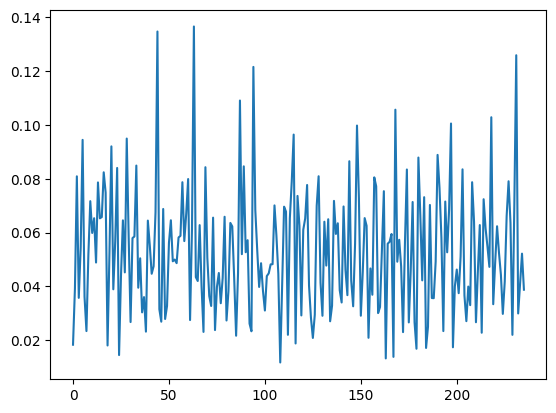

In [118]:
import matplotlib.pyplot as plt

plt.plot(distances);

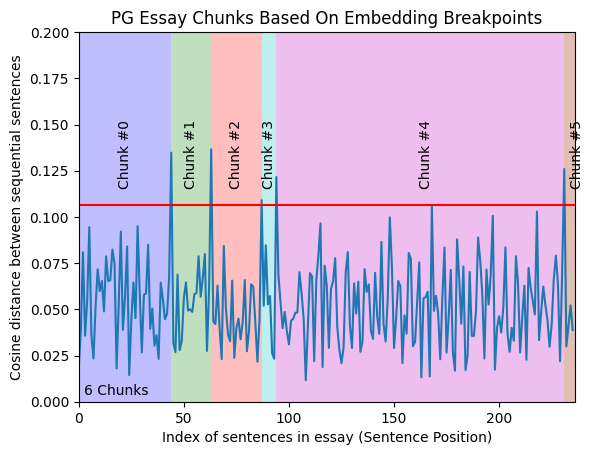

In [127]:
import numpy as np

plt.plot(distances);

y_upper_bound = .2
plt.ylim(0, y_upper_bound)
plt.xlim(0, len(distances))

# We need to get the distance threshold that we'll consider an outlier
# We'll use numpy .percentile() for this
breakpoint_percentile_threshold = 98
breakpoint_distance_threshold = np.percentile(distances, breakpoint_percentile_threshold) # If you want more chunks, lower the percentile cutoff
plt.axhline(y=breakpoint_distance_threshold, color='r', linestyle='-');

# Then we'll see how many distances are actually above this one
num_distances_above_theshold = len([x for x in distances if x > breakpoint_distance_threshold]) # The amount of distances above your threshold
plt.text(x=(len(distances)*.01), y=y_upper_bound/50, s=f"{num_distances_above_theshold + 1} Chunks");

# Then we'll get the index of the distances that are above the threshold. This will tell us where we should split our text
indices_above_thresh = [i for i, x in enumerate(distances) if x > breakpoint_distance_threshold] # The indices of those breakpoints on your list

# Start of the shading and text
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, breakpoint_index in enumerate(indices_above_thresh):
    start_index = 0 if i == 0 else indices_above_thresh[i - 1]
    end_index = breakpoint_index if i < len(indices_above_thresh) - 1 else len(distances)

    plt.axvspan(start_index, end_index, facecolor=colors[i % len(colors)], alpha=0.25)
    plt.text(x=np.average([start_index, end_index]),
             y=breakpoint_distance_threshold + (y_upper_bound)/ 20,
             s=f"Chunk #{i}", horizontalalignment='center',
             rotation='vertical')

# # Additional step to shade from the last breakpoint to the end of the dataset
if indices_above_thresh:
    last_breakpoint = indices_above_thresh[-1]
    if last_breakpoint < len(distances):
        plt.axvspan(last_breakpoint, len(distances), facecolor=colors[len(indices_above_thresh) % len(colors)], alpha=0.25)
        plt.text(x=np.average([last_breakpoint, len(distances)]),
                 y=breakpoint_distance_threshold + (y_upper_bound)/ 20,
                 s=f"Chunk #{i+1}",
                 rotation='vertical')

plt.title("PG Essay Chunks Based On Embedding Breakpoints")
plt.xlabel("Index of sentences in essay (Sentence Position)")
plt.ylabel("Cosine distance between sequential sentences")
plt.show()


In [128]:
# Initialize the start index
start_index = 0

# Create a list to hold the grouped sentences
chunks = []

# Iterate through the breakpoints to slice the sentences
for index in indices_above_thresh:
    # The end index is the current breakpoint
    end_index = index

    # Slice the sentence_dicts from the current start index to the end index
    group = sentences[start_index:end_index + 1]
    combined_text = ' '.join([d['sentence'] for d in group])
    chunks.append(combined_text)
    
    # Update the start index for the next group
    start_index = index + 1

# The last group, if any sentences remain
if start_index < len(sentences):
    combined_text = ' '.join([d['sentence'] for d in sentences[start_index:]])
    chunks.append(combined_text)

# grouped_sentences now contains the chunked sentences

In [129]:


for i, chunk in enumerate(chunks[:2]):
    buffer = 200
    
    print (f"Chunk #{i}")
    print (chunk[:buffer].strip())
    print ("...")
    print (chunk[-buffer:].strip())
    print ("\n")



Chunk #0

Title: None
DOI: 10.3390/su2113436
FullTextURL: http://creativecommons.org/licenses/by/3.0/). FullTextContent:
Sustainability 2010, 2, 3436-3448; doi:10.3390/su2113436 OPEN ACCESS sustainability ISSN

...

harmony: social, economic and environmental. Two, the distinction between  strong  and  weak  sustainability. These
two developments are discussed critically in the Sections 3 4 and 5 6, respectively.

Chunk #1

3. People, Planet, Profit The Brundtland report speaks of two concerns that should be reconciled: development and 
the environment. They can also be interpreted as needs versus resources, or as the sho

...

nalized as employment) and health (expressed by an indicator such as life expectancy or access to medical 
services). However, the equation of  economic  with money is a very limited view of economics.

In [130]:
print(chunks[0])

Title: None
DOI: 10.3390/su2113436
FullTextURL: http://creativecommons.org/licenses/by/3.0/). FullTextContent:
Sustainability 2010, 2, 3436-3448; doi:10.3390/su2113436 OPEN ACCESS sustainability ISSN 2071-1050 
www.mdpi.com/journal/sustainability Review What is Sustainability? Tom Kuhlman 1,* and John Farrington 2 1 
Agricultural Economics Research Institute, Wageningen University, P.O. Box 29703, 2502LS The Hague, The Netherlands
2 Institute for Rural Research, Geography and Environment, University of Aberdeen, Elphinstone Road, Aberdeen AB24 
3UF, Scotland, UK; E-Mail: j.farrington@abdn.ac.uk * Author to whom correspondence should be addressed; E-Mail: 
tom.kuhlman@wur.nl; Tel.: +31-70-3358-232; Fax: +31-70-3615-624. Received: 17 September 2010; in revised form: 15 
October 2010 / Accepted: 19 October 2010 / Published: 1 November 2010 Abstract: Sustainability as a policy concept 
has its origin in the Brundtland Report of 1987. That document was concerned with the tension between the 
aspirations of mankind towards a better life on the one hand and the limitations imposed by nature on the other 
hand. In the course of time, the concept has been re-interpreted as encompassing three dimensions, namely social, 
economic and environmental. The paper argues that this change in meaning (a) obscures the real contradiction 
between the aims of welfare for all and environmental conservation; (b) risks diminishing the importance of the 
environmental dimension; and (c) separates social from economic aspects, which in reality are one and the same. It 
is proposed instead to return to the original meaning, where sustainability is concerned with the well-being of 
future generations and in particular with irreplaceable natural resources as opposed to the gratification of 
present needs which we call well-being. A balance needs to be found between those two, but not by pretending they 
are three sides of the same coin. Although we use up natural resources at the expense of future generations, we 
also generate capital (including knowledge) which raises future well-being. A major question is to what extent the 
one compensates for the other. This debate centres around the problem of substitutability, which has been cast into
a distinction between  weak  and  strong  sustainability. It is argued that these two do not need to be in 
opposition but complement one another. Sustainability 2010, 2 3437 Keywords: sustainability; well-being; welfare 

1. Introduction 
The term sustainability has become popular in policy-oriented research as an expression of what public policies 
ought to achieve. The principal inspiration came from the Brundtland Report of 1987 [1]. Since then the concept has
shifted in meaning. This paper argues that the shift is unfortunate in that it obscures the real contradiction 
which exists between long-term sustainability and short-term welfare. Moreover, the distinction between three  
pillars of sustainability is conceptually fuzzy. We propose a definition that reverts to the original sense in 
which the concept was intended. However, this paper does not pretend to offer a comprehensive view of the problem 
of sustainability. It presents a critical view of how the term is used in policy debate and in impact assessment 
the set of methods used in applied research to appraise policies and projects. 2. History of the Concept The 
concept of sustainability was originally coined in forestry, where it means never harvesting more than what the 
forest yields in new growth [2]. The word Nachhaltigkeit (the German term for sustainability) was first used with 
this meaning in 1713 [3]. The concern with preserving natural resources for the future is perennial, of course: 
undoubtedly our Palaeolithic ancestors worried about their prey becoming extinct, and early farmers must have been 
apprehensive about maintaining soil fertility. Traditional beliefs enjoined thinking in terms of stewardship and 
concern for future generations, a

In [131]:
print(chunks[1])

3. People, Planet, Profit The Brundtland report speaks of two concerns that should be reconciled: development and 
the environment. They can also be interpreted as needs versus resources, or as the short versus the long term. 
Today, however, sustainability is almost always seen in terms of three dimensions: social, economic and 
environmental [8-11]. This is embodied in the definition of sustainability adopted by the United Nations in its 
Agenda for Development: Development is a multidimensional undertaking to achieve a higher quality of life for all 
people. Economic development, social development and environmental protection are interdependent and mutually 
reinforcing components of sustainable development [12]. But what are economic and social development and how are 
they different? Robert Gibson, a political scientist, says that the distinction is needed because  material gains 
are not sufficient measures or preservers of human well-being  [13]. The same author also suggests that the three 
dimensions or  pillars  reflect the disciplines of those who study sustainability, adding for good measure that a 
cultural and a political pillar could also be included [13]. Gibson himself, by the way, rejects the idea of 
pillars altogether and instead formulates seven principles on which sustainability could be based. The idea of 
sustainability having three dimensions stems from the Triple Bottom Line concept, coined by Elkington [14]. As the 
term bottom line suggests, it originates from the world of management science, and Elkington intended it as a way 
to operationalize corporate social responsibility. To the conventional bottom line (profit) should be added care 
for the environment (the planet) as well as being good to people, for instance by providing facilities for the 
handicapped and hiring minorities (the social dimension). The goals of business, however, are very different from 
those of public policy. Although, as in business, revenue is needed to cover government expenditure, maximizing the
excess of revenue over expenditure is not normally considered an appropriate goal for government policy. Government
is not supposed to be a profit-making venture. The  profit  pillar is therefore translated as the money made by the
entire country, expressed as gross domestic product (GDP). This then is the economic dimension, and the social 
dimension ( people ) is everything else connected with human aspirations: equity Sustainability 2010, 2 3439 
(translated as income distribution), inclusion (commonly operationalized as employment) and health (expressed by an
indicator such as life expectancy or access to medical services). However, the equation of  economic  with money is
a very limited view of economics.

In [132]:
print(chunks[2])

Moreover, the view is further restricted if we confine ourselves to the aggregate amount, and not with its 
distribution or with what the money can buy. GDP is intended as a measure of welfare, and as such it is a very 
useful but also a very incomplete and biased one. It is useful for measuring the amount of economic activity and 
because there are relatively good data for it; but it needs to complemented by other indices, such as the Human 
Development Index. These are subjects of study for both economics and sociology, and there is no good reason to 
call one aspect economic and the others social. The sociologist would ask what welfare is and how it can be 
measured (an issue discussed in the next section), whereas the economist s task would be to assess, given human 
aspirations and the scarcity of resources, what course of action is likely to produce the highest degree of 
satisfaction of those aspirations. If there is good reason from a conceptual point of view to prefer a single 
socio-economic dimension, what of its usefulness to policy analysts? Let us consider a hypothetical project which 
scores very well on the environmental dimension but rather poorly on both the social and the economic one. This 
might easily lead a policy-maker to conclude that the project is, on the whole, not a good idea. A two-dimensional 
approach might bring about the opposite judgment: its environmental benefits come at a cost in terms of welfare. 
The environmental dimension may thus receive less weight in a three-dimensional approach. Indeed, some authors 
explicitly state that the three dimensions should receive equal weight [15]. Since socio-economic aspects are 
mostly about the well-being of the present generation and environmental ones are about caring for the future, this 
means the former become twice as important as the latter which violates the Brundtland requirement that development
should not take place at the expense of future generations. Worse, perhaps, is that the contradiction between our 
desire for a better life and our concern for what this may do to the environment is obscured by conceptualizing 
these two concerns into three dimensions, and then suggesting that a solution is possible where all three are in 
harmony. Sustainability then becomes a concept that is equivalent to  good  and thus devoid of any specific meaning
a blanket concept to assure stakeholders of the policy s good intentions. The strength and relevance of the 
original Brundtland concept was precisely that it posed the question of how to reconcile one goal  development  
with another  sustainability . The two goals are often in tension. Therefore, we propose to use the word 
sustainability in the sense as it was intended by the Brundtland Commission, and not as it has been coined later by
corporate types and policy-makers. In the words of Robert Solow [16]: If  sustainability  is anything more than a 
slogan or expression of emotion, it must amount to an injunction to preserve productive capacity for the indefinite
future. Such a concept must be confronted with the socio-economic dimension of human aspirations for a better life:
welfare, well-being, development or some similar concept. Which of these concepts it should be is the topic of the 
following section, before returning to our exploration of sustainability. Sustainability 2010, 2 3440 4. Happiness,
Well-being and Welfare Any of the above words may be used to express a primary goal of government policy: to 
improve people s lives. In dictionaries (e.g., Merriam-Webster [17]), well-being, welfare and happiness are 
commonly seen as synonyms, and offering any one of these three words is deemed sufficient to explain the meaning of
any other. We propose to consider happiness the broadest concept.

In [133]:
chunks[0]

'Title: None\nDOI: 10.3390/su2113436\nFullTextURL: http://creativecommons.org/licenses/by/3.0/). FullTextContent:\nSustainability 2010, 2, 3436-3448; doi:10.3390/su2113436 OPEN ACCESS sustainability ISSN 2071-1050 www.mdpi.com/journal/sustainability Review What is Sustainability? Tom Kuhlman 1,* and John Farrington 2 1 Agricultural Economics Research Institute, Wageningen University, P.O. Box 29703, 2502LS The Hague, The Netherlands 2 Institute for Rural Research, Geography and Environment, University of Aberdeen, Elphinstone Road, Aberdeen AB24 3UF, Scotland, UK; E-Mail: j.farrington@abdn.ac.uk * Author to whom correspondence should be addressed; E-Mail: tom.kuhlman@wur.nl; Tel.: +31-70-3358-232; Fax: +31-70-3615-624. Received: 17 September 2010; in revised form: 15 October 2010 / Accepted: 19 October 2010 / Published: 1 November 2010 Abstract: Sustainability as a policy concept has its origin in the Brundtland Report of 1987. That document was concerned with the tension between the a

In [134]:
for idx, chunk in enumerate(chunks):
    words = re.findall(r'\b\w+\b', chunk)
    print(f"Chunk #{idx}: {len(words)} words")


Chunk #0: 1068 words

Chunk #1: 410 words

Chunk #2: 627 words

Chunk #3: 145 words

Chunk #4: 3276 words

Chunk #5: 132 words